In [1]:
### Imports (TODO remove this when finished)
%load_ext autoreload
%autoreload 2

# Append root folder in case you haven't installed NIDN
import sys
sys.path.append("../..")

import nidn

08:46:37|NIDN-INFO| Initialized NIDN for cpu
08:46:37|NIDN-INFO| Using double precision


# Single layer , uniform, regression

Physical wavelengths are (in meters):
[1.00000000e-05 9.67687890e-06 9.36419852e-06 9.06162150e-06
 8.76882139e-06 8.48548227e-06 8.21129843e-06 7.94597405e-06
 7.68922286e-06 7.44076784e-06 7.20034093e-06 6.96768272e-06
 6.74254219e-06 6.52467642e-06 6.31385036e-06 6.10983653e-06
 5.91241481e-06 5.72137222e-06 5.53650261e-06 5.35760652e-06
 5.18449095e-06 5.01696911e-06 4.85486025e-06 4.69798947e-06
 4.54618751e-06 4.39929060e-06 4.25714024e-06 4.11958305e-06
 3.98647063e-06 3.85765935e-06 3.73301024e-06 3.61238880e-06
 3.49566489e-06 3.38271258e-06 3.27341000e-06 3.16763922e-06
 3.06528611e-06 2.96624025e-06 2.87039476e-06 2.77764625e-06
 2.68789464e-06 2.60104309e-06 2.51699790e-06 2.43566839e-06
 2.35696680e-06 2.28080823e-06 2.20711050e-06 2.13579411e-06
 2.06678209e-06 2.00000000e-06]


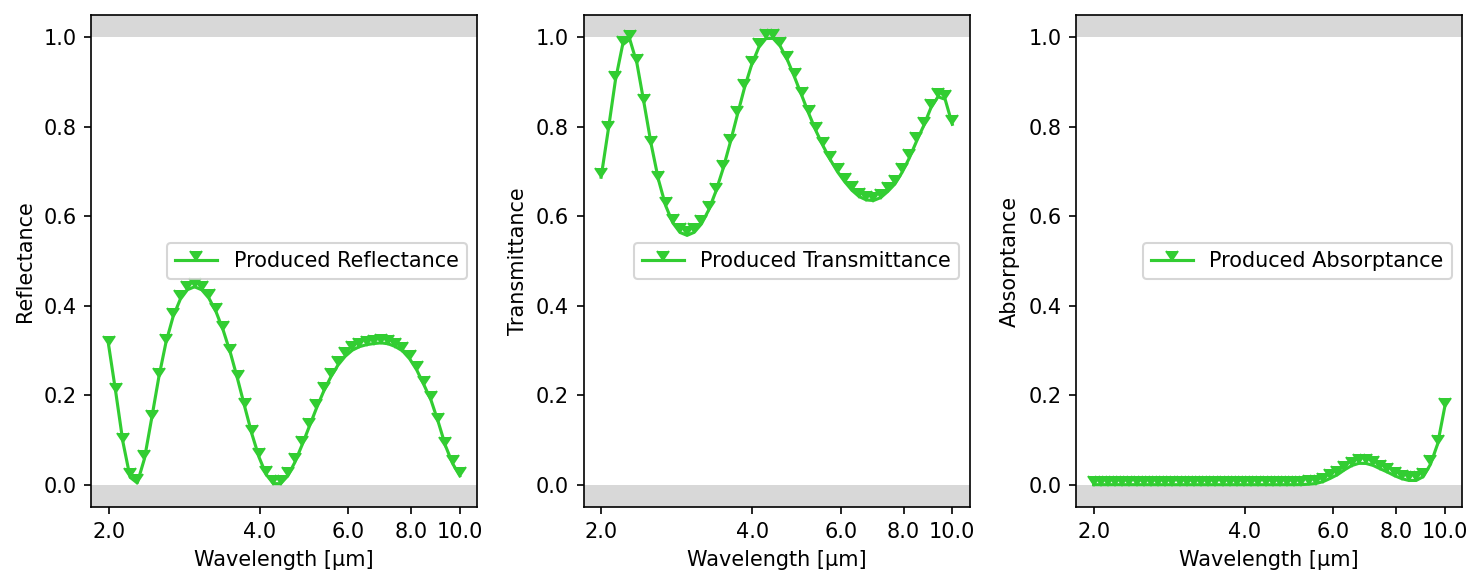

In [2]:
# Load default cfg as starting point
cfg = nidn.load_default_cfg()

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 2e-6
cfg.physical_wavelength_range[1] = 1e-5
cfg.PER_LAYER_THICKNESS = [1.]
cfg.TRCWA_L_grid = [[1.0,0.0],[0.0,1.0]]
cfg.freq_distribution = "log"
cfg.siren_omega = 1.

# Let's investigate 32 frequency points
cfg.N_freq = 50

# Currently, the target spectra is set manually as a list of numbers 
cfg.target_reflectance_spectrum = [0.01990215,0.04728071,0.08716609,0.13999258,0.18830960,0.22315259,0.25630232,0.28152192,0.29933946,0.30892036,0.31509786,0.31710336,0.31556279,0.31309837,0.30863096,0.30071653,0.28684941,0.26730741,0.24081118,0.20858054,0.17094725,0.12999624,0.08915847,0.05051830,0.01976309,0.00227082,0.00242139,0.02239073,0.06111604,0.11309443,0.17386812,0.23612637,0.29457018,0.34478804,0.38628227,0.41693407,0.43564378,0.44249644,0.43594932,0.41444401,0.37586218,0.31787402,0.23989091,0.14770234,0.05799381,0.00398777,0.01661932,0.09557429,0.20664216,0.31245563,]
cfg.target_transmittance_spectrum = [0.80566155,0.86160385,0.86728087,0.84190447,0.80215258,0.76732824,0.73015897,0.69836191,0.67238730,0.65553712,0.64175282,0.63528599,0.63663443,0.64418210,0.65811991,0.67710729,0.69911350,0.72590540,0.75649485,0.79033701,0.82874515,0.86990899,0.91078512,0.94943171,0.98018489,0.99767452,0.99752190,0.97755126,0.93882552,0.88684743,0.82607457,0.76381737,0.70537459,0.65515751,0.61366367,0.58301175,0.56430127,0.55744710,0.56399180,0.58549360,0.62407052,0.68205209,0.76002673,0.85220523,0.94190326,0.99590118,0.98326688,0.90431504,0.79325365,0.68744676,]

nidn.plot_spectrum(cfg,
                   cfg.target_reflectance_spectrum,
                   cfg.target_transmittance_spectrum)

physical_wls, normalized_freqs = nidn.get_frequency_points(cfg)
print("Physical wavelengths are (in meters):")
print(physical_wls)

In [3]:
cfg.Nx = 1 # Set layer size  to 1x1 (interpreted as uniform)
cfg.Ny = 1
cfg.N_layers = 1 # Choose number of layers
cfg.eps_oversampling = 1

In [4]:
cfg.pop("model",None); # Forget the old model

# Allowed range of epsilon values
cfg.real_min_eps = 0.01
cfg.real_max_eps = 20.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 1.0

cfg.type = "regression" # Choose type as described above
cfg.iterations = 3000 # Set number of training iterations (that is forward model evaluations) to perform

In [5]:
nidn.print_cfg(cfg)

name                   : example_name   |use_gpu                : 0              |seed                   : 100            |
model_type             : siren          |iterations             : 3000           |learning_rate          : 8e-05          |
type                   : regression     |reg_loss_weight        : 0.05           |use_regularization_loss: 1              |
L                      : 1.0            |absorption_loss        : 0              |n_neurons              : 100            |
hidden_layers          : 9              |encoding_dim           : 4              |siren_omega            : 1.0            |
add_noise              : 0              |noise_scale            : 0.001          |eps_oversampling       : 1              |
real_min_eps           : 0.01           |real_max_eps           : 20.0           |imag_min_eps           : 0.0            |
imag_max_eps           : 1.0            |solver                 : TRCWA          |Nx                     : 1              |
Ny      

In [6]:
nidn.run_training(cfg);

08:46:40|NIDN-INFO| ###  New Best=0.2314 with SpectrumLoss=0.2314 ### L1=0.2314
08:46:40|NIDN-INFO| It=0     Loss=0.2314   |  weighted_avg=0.2314  |  SpectrumLoss=0.2314 | L1=0.2314
08:46:40|NIDN-INFO| ###  New Best=0.1862 with SpectrumLoss=0.1862 ### L1=0.1862
08:46:40|NIDN-INFO| ###  New Best=0.1711 with SpectrumLoss=0.1711 ### L1=0.1711
08:46:41|NIDN-INFO| ###  New Best=0.1667 with SpectrumLoss=0.1667 ### L1=0.1667
08:46:42|NIDN-INFO| ###  New Best=0.1530 with SpectrumLoss=0.1530 ### L1=0.1530
08:46:42|NIDN-INFO| It=5     Loss=0.1530   |  weighted_avg=0.1803  |  SpectrumLoss=0.1530 | L1=0.1530
08:46:42|NIDN-INFO| ###  New Best=0.1443 with SpectrumLoss=0.1443 ### L1=0.1443
08:46:43|NIDN-INFO| ###  New Best=0.1273 with SpectrumLoss=0.1273 ### L1=0.1273
08:46:43|NIDN-INFO| ###  New Best=0.1202 with SpectrumLoss=0.1202 ### L1=0.1202
08:46:44|NIDN-INFO| ###  New Best=0.1171 with SpectrumLoss=0.1171 ### L1=0.1171
08:46:44|NIDN-INFO| ###  New Best=0.1144 with SpectrumLoss=0.1144 ### L1=0.1

08:47:53|NIDN-INFO| It=155   Loss=0.0334   |  weighted_avg=0.0326  |  SpectrumLoss=0.0334 | L1=0.0334
08:47:55|NIDN-INFO| It=160   Loss=0.0362   |  weighted_avg=0.0322  |  SpectrumLoss=0.0362 | L1=0.0362
08:47:57|NIDN-INFO| It=165   Loss=0.0399   |  weighted_avg=0.0325  |  SpectrumLoss=0.0399 | L1=0.0399
08:47:59|NIDN-INFO| It=170   Loss=0.0364   |  weighted_avg=0.0337  |  SpectrumLoss=0.0364 | L1=0.0364
08:48:01|NIDN-INFO| It=175   Loss=0.0362   |  weighted_avg=0.0352  |  SpectrumLoss=0.0362 | L1=0.0362
08:48:03|NIDN-INFO| It=180   Loss=0.0313   |  weighted_avg=0.0354  |  SpectrumLoss=0.0313 | L1=0.0313
08:48:06|NIDN-INFO| It=185   Loss=0.0334   |  weighted_avg=0.0344  |  SpectrumLoss=0.0334 | L1=0.0334
08:48:08|NIDN-INFO| It=190   Loss=0.0333   |  weighted_avg=0.0334  |  SpectrumLoss=0.0333 | L1=0.0333
08:48:10|NIDN-INFO| It=195   Loss=0.0308   |  weighted_avg=0.0325  |  SpectrumLoss=0.0308 | L1=0.0308
08:48:12|NIDN-INFO| It=200   Loss=0.0340   |  weighted_avg=0.0326  |  SpectrumLoss

08:49:53|NIDN-INFO| It=410   Loss=0.0221   |  weighted_avg=0.0249  |  SpectrumLoss=0.0221 | L1=0.0221
08:49:55|NIDN-INFO| It=415   Loss=0.0224   |  weighted_avg=0.0245  |  SpectrumLoss=0.0224 | L1=0.0224
08:49:58|NIDN-INFO| It=420   Loss=0.0209   |  weighted_avg=0.0241  |  SpectrumLoss=0.0209 | L1=0.0209
08:50:00|NIDN-INFO| It=425   Loss=0.0206   |  weighted_avg=0.0228  |  SpectrumLoss=0.0206 | L1=0.0206
08:50:02|NIDN-INFO| It=430   Loss=0.0233   |  weighted_avg=0.0225  |  SpectrumLoss=0.0233 | L1=0.0233
08:50:04|NIDN-INFO| ###  New Best=0.0197 with SpectrumLoss=0.0197 ### L1=0.0197
08:50:05|NIDN-INFO| It=435   Loss=0.0244   |  weighted_avg=0.0223  |  SpectrumLoss=0.0244 | L1=0.0244
08:50:07|NIDN-INFO| It=440   Loss=0.0239   |  weighted_avg=0.0227  |  SpectrumLoss=0.0239 | L1=0.0239
08:50:09|NIDN-INFO| It=445   Loss=0.0246   |  weighted_avg=0.0232  |  SpectrumLoss=0.0246 | L1=0.0246
08:50:12|NIDN-INFO| It=450   Loss=0.0256   |  weighted_avg=0.0237  |  SpectrumLoss=0.0256 | L1=0.0256
08

08:52:10|NIDN-INFO| It=710   Loss=0.0187   |  weighted_avg=0.0218  |  SpectrumLoss=0.0187 | L1=0.0187
08:52:12|NIDN-INFO| It=715   Loss=0.0185   |  weighted_avg=0.0211  |  SpectrumLoss=0.0185 | L1=0.0185
08:52:14|NIDN-INFO| It=720   Loss=0.0271   |  weighted_avg=0.0212  |  SpectrumLoss=0.0271 | L1=0.0271
08:52:16|NIDN-INFO| It=725   Loss=0.0209   |  weighted_avg=0.0213  |  SpectrumLoss=0.0209 | L1=0.0209
08:52:19|NIDN-INFO| It=730   Loss=0.0223   |  weighted_avg=0.0216  |  SpectrumLoss=0.0223 | L1=0.0223
08:52:21|NIDN-INFO| It=735   Loss=0.0215   |  weighted_avg=0.0218  |  SpectrumLoss=0.0215 | L1=0.0215
08:52:23|NIDN-INFO| It=740   Loss=0.0266   |  weighted_avg=0.0220  |  SpectrumLoss=0.0266 | L1=0.0266
08:52:25|NIDN-INFO| It=745   Loss=0.0244   |  weighted_avg=0.0222  |  SpectrumLoss=0.0244 | L1=0.0244
08:52:28|NIDN-INFO| It=750   Loss=0.0236   |  weighted_avg=0.0227  |  SpectrumLoss=0.0236 | L1=0.0236
08:52:30|NIDN-INFO| It=755   Loss=0.0238   |  weighted_avg=0.0229  |  SpectrumLoss

08:54:25|NIDN-INFO| It=1010  Loss=0.0230   |  weighted_avg=0.0213  |  SpectrumLoss=0.0230 | L1=0.0230
08:54:28|NIDN-INFO| It=1015  Loss=0.0258   |  weighted_avg=0.0223  |  SpectrumLoss=0.0258 | L1=0.0258
08:54:30|NIDN-INFO| It=1020  Loss=0.0207   |  weighted_avg=0.0225  |  SpectrumLoss=0.0207 | L1=0.0207
08:54:32|NIDN-INFO| It=1025  Loss=0.0229   |  weighted_avg=0.0232  |  SpectrumLoss=0.0229 | L1=0.0229
08:54:34|NIDN-INFO| It=1030  Loss=0.0244   |  weighted_avg=0.0238  |  SpectrumLoss=0.0244 | L1=0.0244
08:54:36|NIDN-INFO| It=1035  Loss=0.0254   |  weighted_avg=0.0239  |  SpectrumLoss=0.0254 | L1=0.0254
08:54:39|NIDN-INFO| It=1040  Loss=0.0232   |  weighted_avg=0.0242  |  SpectrumLoss=0.0232 | L1=0.0232
08:54:41|NIDN-INFO| It=1045  Loss=0.0206   |  weighted_avg=0.0230  |  SpectrumLoss=0.0206 | L1=0.0206
08:54:43|NIDN-INFO| It=1050  Loss=0.0172   |  weighted_avg=0.0218  |  SpectrumLoss=0.0172 | L1=0.0172
08:54:45|NIDN-INFO| It=1055  Loss=0.0186   |  weighted_avg=0.0208  |  SpectrumLoss

08:56:39|NIDN-INFO| It=1310  Loss=0.0180   |  weighted_avg=0.0167  |  SpectrumLoss=0.0180 | L1=0.0180
08:56:40|NIDN-INFO| ###  New Best=0.0152 with SpectrumLoss=0.0152 ### L1=0.0152
08:56:42|NIDN-INFO| It=1315  Loss=0.0171   |  weighted_avg=0.0167  |  SpectrumLoss=0.0171 | L1=0.0171
08:56:44|NIDN-INFO| It=1320  Loss=0.0162   |  weighted_avg=0.0175  |  SpectrumLoss=0.0162 | L1=0.0162
08:56:46|NIDN-INFO| It=1325  Loss=0.0181   |  weighted_avg=0.0184  |  SpectrumLoss=0.0181 | L1=0.0181
08:56:48|NIDN-INFO| It=1330  Loss=0.0178   |  weighted_avg=0.0188  |  SpectrumLoss=0.0178 | L1=0.0178
08:56:51|NIDN-INFO| It=1335  Loss=0.0207   |  weighted_avg=0.0193  |  SpectrumLoss=0.0207 | L1=0.0207
08:56:53|NIDN-INFO| It=1340  Loss=0.0169   |  weighted_avg=0.0188  |  SpectrumLoss=0.0169 | L1=0.0169
08:56:55|NIDN-INFO| It=1345  Loss=0.0179   |  weighted_avg=0.0182  |  SpectrumLoss=0.0179 | L1=0.0179
08:56:57|NIDN-INFO| It=1350  Loss=0.0167   |  weighted_avg=0.0180  |  SpectrumLoss=0.0167 | L1=0.0167
08

08:59:00|NIDN-INFO| It=1625  Loss=0.0182   |  weighted_avg=0.0171  |  SpectrumLoss=0.0182 | L1=0.0182
08:59:03|NIDN-INFO| It=1630  Loss=0.0163   |  weighted_avg=0.0169  |  SpectrumLoss=0.0163 | L1=0.0163
08:59:05|NIDN-INFO| It=1635  Loss=0.0182   |  weighted_avg=0.0170  |  SpectrumLoss=0.0182 | L1=0.0182
08:59:07|NIDN-INFO| It=1640  Loss=0.0180   |  weighted_avg=0.0171  |  SpectrumLoss=0.0180 | L1=0.0180
08:59:10|NIDN-INFO| It=1645  Loss=0.0167   |  weighted_avg=0.0172  |  SpectrumLoss=0.0167 | L1=0.0167
08:59:12|NIDN-INFO| It=1650  Loss=0.0252   |  weighted_avg=0.0179  |  SpectrumLoss=0.0252 | L1=0.0252
08:59:14|NIDN-INFO| It=1655  Loss=0.0157   |  weighted_avg=0.0181  |  SpectrumLoss=0.0157 | L1=0.0157
08:59:16|NIDN-INFO| It=1660  Loss=0.0201   |  weighted_avg=0.0185  |  SpectrumLoss=0.0201 | L1=0.0201
08:59:18|NIDN-INFO| It=1665  Loss=0.0158   |  weighted_avg=0.0186  |  SpectrumLoss=0.0158 | L1=0.0158
08:59:21|NIDN-INFO| It=1670  Loss=0.0175   |  weighted_avg=0.0181  |  SpectrumLoss

09:01:15|NIDN-INFO| It=1925  Loss=0.0160   |  weighted_avg=0.0190  |  SpectrumLoss=0.0160 | L1=0.0160
09:01:17|NIDN-INFO| It=1930  Loss=0.0168   |  weighted_avg=0.0183  |  SpectrumLoss=0.0168 | L1=0.0168
09:01:19|NIDN-INFO| It=1935  Loss=0.0177   |  weighted_avg=0.0180  |  SpectrumLoss=0.0177 | L1=0.0177
09:01:21|NIDN-INFO| It=1940  Loss=0.0175   |  weighted_avg=0.0177  |  SpectrumLoss=0.0175 | L1=0.0175
09:01:23|NIDN-INFO| It=1945  Loss=0.0212   |  weighted_avg=0.0180  |  SpectrumLoss=0.0212 | L1=0.0212
09:01:26|NIDN-INFO| It=1950  Loss=0.0221   |  weighted_avg=0.0189  |  SpectrumLoss=0.0221 | L1=0.0221
09:01:28|NIDN-INFO| It=1955  Loss=0.0194   |  weighted_avg=0.0191  |  SpectrumLoss=0.0194 | L1=0.0194
09:01:30|NIDN-INFO| It=1960  Loss=0.0162   |  weighted_avg=0.0195  |  SpectrumLoss=0.0162 | L1=0.0162
09:01:32|NIDN-INFO| It=1965  Loss=0.0165   |  weighted_avg=0.0188  |  SpectrumLoss=0.0165 | L1=0.0165
09:01:35|NIDN-INFO| It=1970  Loss=0.0142   |  weighted_avg=0.0176  |  SpectrumLoss

09:03:41|NIDN-INFO| It=2250  Loss=0.0166   |  weighted_avg=0.0171  |  SpectrumLoss=0.0166 | L1=0.0166
09:03:43|NIDN-INFO| It=2255  Loss=0.0218   |  weighted_avg=0.0177  |  SpectrumLoss=0.0218 | L1=0.0218
09:03:45|NIDN-INFO| It=2260  Loss=0.0243   |  weighted_avg=0.0188  |  SpectrumLoss=0.0243 | L1=0.0243
09:03:48|NIDN-INFO| It=2265  Loss=0.0255   |  weighted_avg=0.0201  |  SpectrumLoss=0.0255 | L1=0.0255
09:03:50|NIDN-INFO| It=2270  Loss=0.0212   |  weighted_avg=0.0214  |  SpectrumLoss=0.0212 | L1=0.0212
09:03:52|NIDN-INFO| It=2275  Loss=0.0256   |  weighted_avg=0.0223  |  SpectrumLoss=0.0256 | L1=0.0256
09:03:54|NIDN-INFO| It=2280  Loss=0.0284   |  weighted_avg=0.0230  |  SpectrumLoss=0.0284 | L1=0.0284
09:03:57|NIDN-INFO| It=2285  Loss=0.0224   |  weighted_avg=0.0236  |  SpectrumLoss=0.0224 | L1=0.0224
09:03:59|NIDN-INFO| It=2290  Loss=0.0181   |  weighted_avg=0.0225  |  SpectrumLoss=0.0181 | L1=0.0181
09:04:01|NIDN-INFO| It=2295  Loss=0.0177   |  weighted_avg=0.0218  |  SpectrumLoss

Epoch  2341: reducing learning rate of group 0 to 5.2800e-05.


09:04:22|NIDN-INFO| It=2345  Loss=0.0216   |  weighted_avg=0.0181  |  SpectrumLoss=0.0216 | L1=0.0216
09:04:24|NIDN-INFO| It=2350  Loss=0.0170   |  weighted_avg=0.0186  |  SpectrumLoss=0.0170 | L1=0.0170
09:04:26|NIDN-INFO| It=2355  Loss=0.0158   |  weighted_avg=0.0185  |  SpectrumLoss=0.0158 | L1=0.0158
09:04:29|NIDN-INFO| It=2360  Loss=0.0165   |  weighted_avg=0.0180  |  SpectrumLoss=0.0165 | L1=0.0165
09:04:31|NIDN-INFO| It=2365  Loss=0.0154   |  weighted_avg=0.0165  |  SpectrumLoss=0.0154 | L1=0.0154
09:04:33|NIDN-INFO| It=2370  Loss=0.0151   |  weighted_avg=0.0158  |  SpectrumLoss=0.0151 | L1=0.0151
09:04:35|NIDN-INFO| It=2375  Loss=0.0156   |  weighted_avg=0.0157  |  SpectrumLoss=0.0156 | L1=0.0156
09:04:37|NIDN-INFO| It=2380  Loss=0.0154   |  weighted_avg=0.0155  |  SpectrumLoss=0.0154 | L1=0.0154
09:04:40|NIDN-INFO| It=2385  Loss=0.0148   |  weighted_avg=0.0155  |  SpectrumLoss=0.0148 | L1=0.0148
09:04:40|NIDN-INFO| ###  New Best=0.0135 with SpectrumLoss=0.0135 ### L1=0.0135
09

09:06:37|NIDN-INFO| ###  New Best=0.0130 with SpectrumLoss=0.0130 ### L1=0.0130
09:06:37|NIDN-INFO| It=2650  Loss=0.0130   |  weighted_avg=0.0142  |  SpectrumLoss=0.0130 | L1=0.0130
09:06:40|NIDN-INFO| It=2655  Loss=0.0133   |  weighted_avg=0.0138  |  SpectrumLoss=0.0133 | L1=0.0133
09:06:42|NIDN-INFO| It=2660  Loss=0.0131   |  weighted_avg=0.0137  |  SpectrumLoss=0.0131 | L1=0.0131
09:06:44|NIDN-INFO| It=2665  Loss=0.0150   |  weighted_avg=0.0140  |  SpectrumLoss=0.0150 | L1=0.0150
09:06:45|NIDN-INFO| ###  New Best=0.0128 with SpectrumLoss=0.0128 ### L1=0.0128
09:06:46|NIDN-INFO| It=2670  Loss=0.0136   |  weighted_avg=0.0139  |  SpectrumLoss=0.0136 | L1=0.0136
09:06:49|NIDN-INFO| It=2675  Loss=0.0135   |  weighted_avg=0.0140  |  SpectrumLoss=0.0135 | L1=0.0135
09:06:51|NIDN-INFO| It=2680  Loss=0.0158   |  weighted_avg=0.0140  |  SpectrumLoss=0.0158 | L1=0.0158
09:06:53|NIDN-INFO| It=2685  Loss=0.0141   |  weighted_avg=0.0140  |  SpectrumLoss=0.0141 | L1=0.0141
09:06:55|NIDN-INFO| It=2

09:08:55|NIDN-INFO| It=2955  Loss=0.0159   |  weighted_avg=0.0151  |  SpectrumLoss=0.0159 | L1=0.0159
09:08:57|NIDN-INFO| It=2960  Loss=0.0158   |  weighted_avg=0.0152  |  SpectrumLoss=0.0158 | L1=0.0158
09:08:59|NIDN-INFO| It=2965  Loss=0.0168   |  weighted_avg=0.0153  |  SpectrumLoss=0.0168 | L1=0.0168
09:09:01|NIDN-INFO| It=2970  Loss=0.0154   |  weighted_avg=0.0155  |  SpectrumLoss=0.0154 | L1=0.0154
09:09:04|NIDN-INFO| It=2975  Loss=0.0132   |  weighted_avg=0.0153  |  SpectrumLoss=0.0132 | L1=0.0132
09:09:06|NIDN-INFO| It=2980  Loss=0.0139   |  weighted_avg=0.0147  |  SpectrumLoss=0.0139 | L1=0.0139
09:09:08|NIDN-INFO| It=2985  Loss=0.0132   |  weighted_avg=0.0144  |  SpectrumLoss=0.0132 | L1=0.0132
09:09:10|NIDN-INFO| It=2990  Loss=0.0135   |  weighted_avg=0.0138  |  SpectrumLoss=0.0135 | L1=0.0135
09:09:12|NIDN-INFO| It=2995  Loss=0.0139   |  weighted_avg=0.0137  |  SpectrumLoss=0.0139 | L1=0.0139


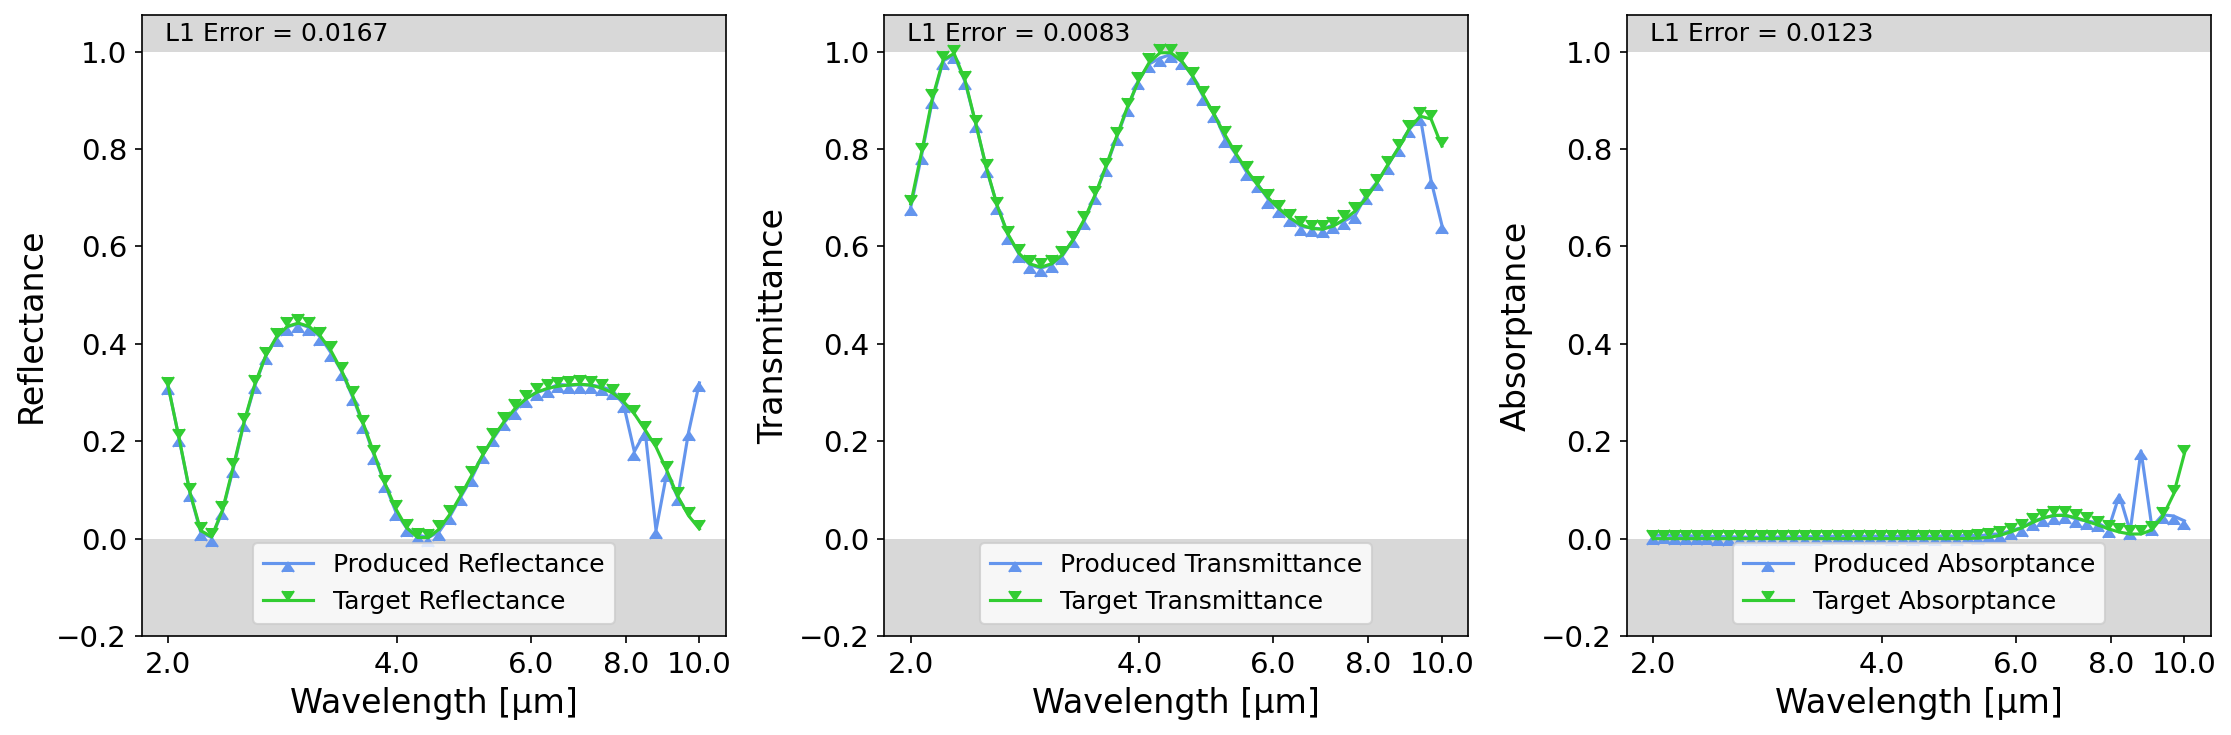

In [7]:
nidn.plot_spectra(cfg)

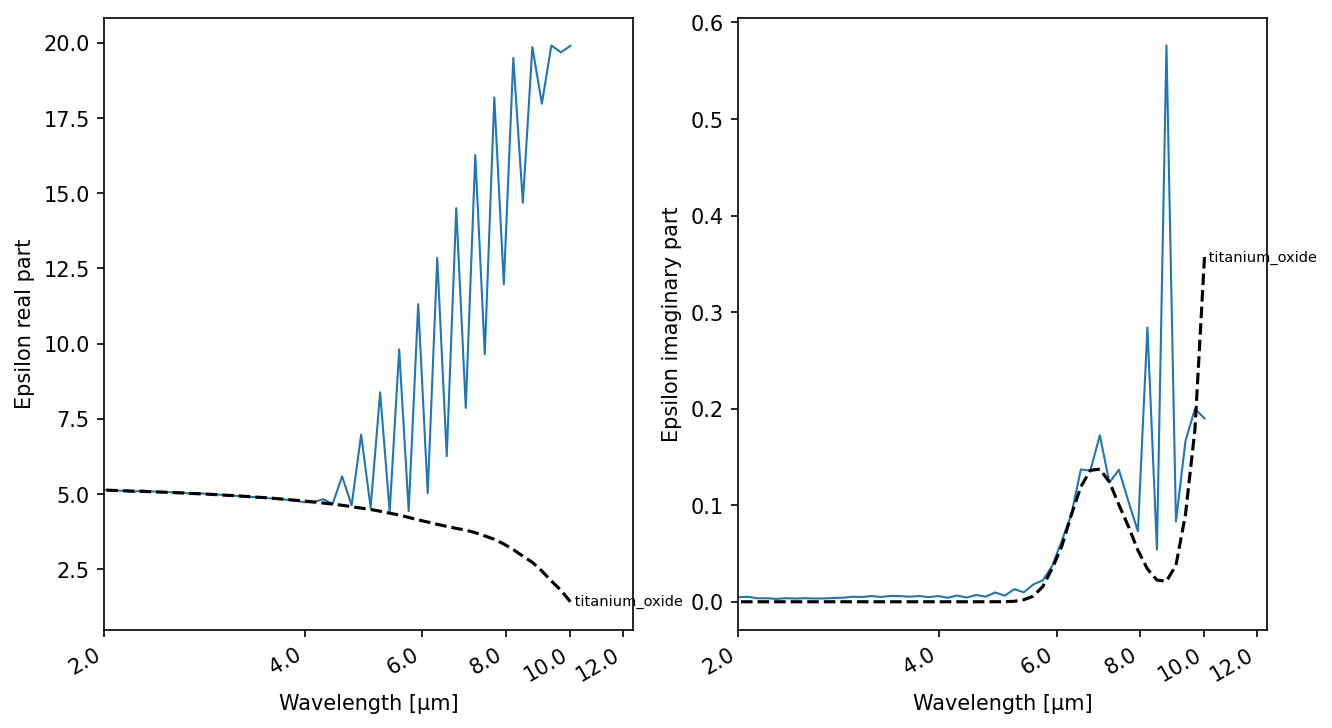

In [8]:
nidn.plot_eps_per_point(cfg,compare_to_material="titanium_oxide",legend=False)

In [9]:
cfg.name = "1layer_rcwa_reg"
nidn.save_run(cfg)

09:09:17|NIDN-INFO| Saving run to file: ../results//1layer_rcwa_reg_20-05-2022 09-09-17_run.pk


# Single layer , uniform, classification

In [10]:
cfg.pop("model",None); # Forget the old model

# Allowed range of epsilon values
cfg.real_min_eps = 0.0
cfg.real_max_eps = 20.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 3.0

cfg.type = "classification" # Choose type as described above
cfg.iterations = 1000 # Set number of training iterations (that is forward model evaluations) to perform

In [11]:
nidn.run_training(cfg);

09:09:18|NIDN-INFO| ###  New Best=0.3019 with SpectrumLoss=0.2990 ### L1=0.2990
09:09:18|NIDN-INFO| It=0     Loss=0.3019   |  weighted_avg=0.3019  |  SpectrumLoss=0.2990 | L1=0.2990
09:09:18|NIDN-INFO| ###  New Best=0.2661 with SpectrumLoss=0.2628 ### L1=0.2628
09:09:19|NIDN-INFO| ###  New Best=0.1656 with SpectrumLoss=0.1606 ### L1=0.1606
09:09:19|NIDN-INFO| ###  New Best=0.0365 with SpectrumLoss=0.0338 ### L1=0.0338
09:09:20|NIDN-INFO| It=5     Loss=0.0558   |  weighted_avg=0.1465  |  SpectrumLoss=0.0539 | L1=0.0539
09:09:21|NIDN-INFO| ###  New Best=0.0273 with SpectrumLoss=0.0223 ### L1=0.0223
09:09:22|NIDN-INFO| ###  New Best=0.0233 with SpectrumLoss=0.0198 ### L1=0.0198
09:09:22|NIDN-INFO| ###  New Best=0.0136 with SpectrumLoss=0.0111 ### L1=0.0111
09:09:22|NIDN-INFO| It=10    Loss=0.0136   |  weighted_avg=0.0937  |  SpectrumLoss=0.0111 | L1=0.0111
09:09:23|NIDN-INFO| ###  New Best=0.0079 with SpectrumLoss=0.0062 ### L1=0.0062
09:09:23|NIDN-INFO| ###  New Best=0.0057 with Spectrum

09:09:49|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
09:09:49|NIDN-INFO| It=70    Loss=0.0003   |  weighted_avg=0.0003  |  SpectrumLoss=0.0002 | L1=0.0002
09:09:50|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
09:09:50|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:09:50|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:09:51|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:09:51|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:09:51|NIDN-INFO| It=75    Loss=0.0002   |  weighted_avg=0.0003  |  SpectrumLoss=0.0002 | L1=0.0002
09:09:52|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:09:52|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:09:53|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:09:53|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0

09:10:17|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:17|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:18|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:18|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:18|NIDN-INFO| It=135   Loss=0.0001   |  weighted_avg=0.0002  |  SpectrumLoss=0.0001 | L1=0.0001
09:10:19|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:19|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:20|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:20|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:20|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:20|NIDN-INFO| It=140   Loss=0.0001   |  weighted_avg=0.0002  |  SpectrumLoss=0.0001 | L1=0.0001
09:10:21|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

09:10:45|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:45|NIDN-INFO| It=195   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:10:45|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:46|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:46|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:47|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:47|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:47|NIDN-INFO| It=200   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:10:48|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:48|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:49|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:10:49|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

09:11:13|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:13|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:14|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:14|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:14|NIDN-INFO| It=260   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:11:15|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:15|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:16|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:16|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:16|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:17|NIDN-INFO| It=265   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:11:17|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

09:11:41|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:41|NIDN-INFO| It=320   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:11:41|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:42|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:42|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:43|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:43|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:43|NIDN-INFO| It=325   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:11:43|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:44|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:44|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:11:45|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

09:12:08|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:09|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:09|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:10|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:10|NIDN-INFO| It=385   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0000 | L1=0.0000
09:12:10|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:10|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:11|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:11|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:12|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:12|NIDN-INFO| It=390   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0000 | L1=0.0000
09:12:12|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0000 ### L1=0.0

09:12:37|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:37|NIDN-INFO| It=445   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:12:37|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:38|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:38|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:38|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:39|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:39|NIDN-INFO| It=450   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:12:39|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:40|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:40|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:12:41|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0

09:13:05|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:05|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:06|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:06|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:06|NIDN-INFO| It=510   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:13:07|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:07|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:08|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:08|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:09|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:09|NIDN-INFO| It=515   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:13:09|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0

09:13:33|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:33|NIDN-INFO| It=570   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:13:34|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:34|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:35|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:35|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:35|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:35|NIDN-INFO| It=575   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:13:36|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:36|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:37|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:13:37|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0

09:14:02|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:02|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:03|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:03|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:03|NIDN-INFO| It=635   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:14:04|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:04|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:04|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:05|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:05|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:05|NIDN-INFO| It=640   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:14:06|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0

09:14:30|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:30|NIDN-INFO| It=695   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:14:31|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:31|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:32|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:32|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:33|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:33|NIDN-INFO| It=700   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:14:33|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:34|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:34|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:35|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0

09:14:58|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:59|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:14:59|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:00|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:00|NIDN-INFO| It=760   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:15:00|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:01|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:01|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:02|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:02|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:02|NIDN-INFO| It=765   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:15:02|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0

09:15:27|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:27|NIDN-INFO| It=820   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:15:27|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:28|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:28|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:29|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:29|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:29|NIDN-INFO| It=825   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:15:30|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:30|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:31|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:31|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0

09:15:55|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:56|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:56|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:57|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:57|NIDN-INFO| It=885   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:15:57|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:58|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:58|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:59|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:59|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:15:59|NIDN-INFO| It=890   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:16:00|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0

09:16:24|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:16:24|NIDN-INFO| It=945   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:16:24|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:16:25|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:16:25|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:16:25|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:16:26|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:16:26|NIDN-INFO| It=950   Loss=0.0000   |  weighted_avg=0.0000  |  SpectrumLoss=0.0000 | L1=0.0000
09:16:26|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:16:27|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:16:27|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0000
09:16:28|NIDN-INFO| ###  New Best=0.0000 with SpectrumLoss=0.0000 ### L1=0.0

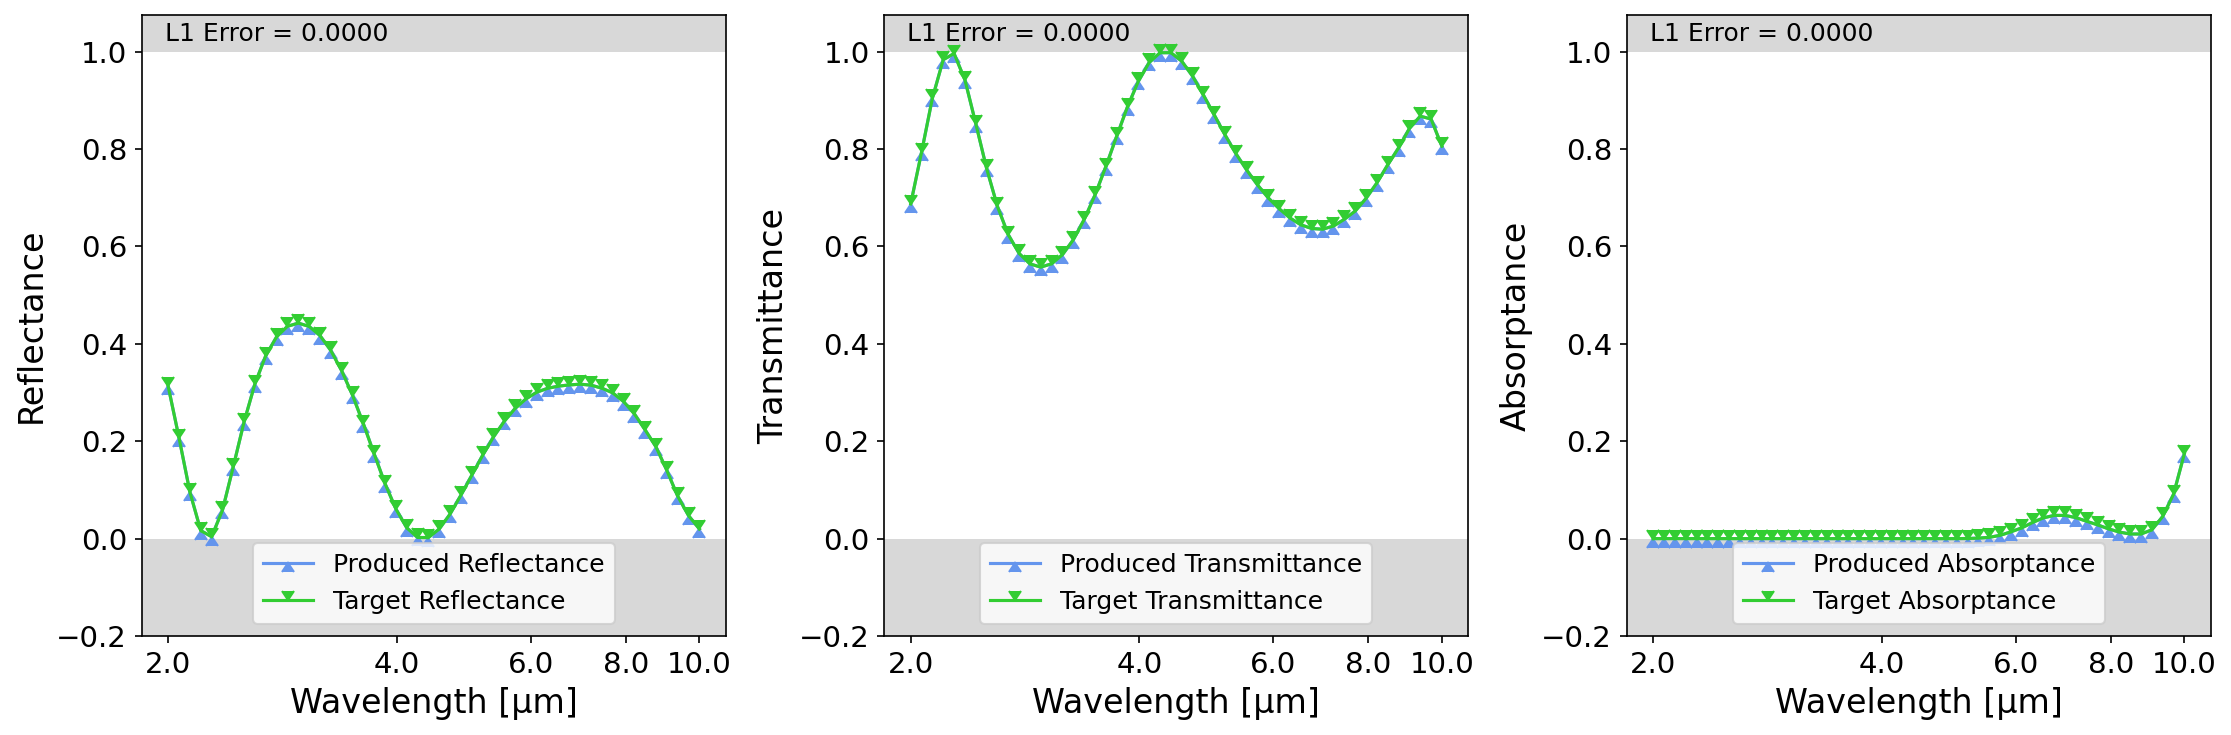

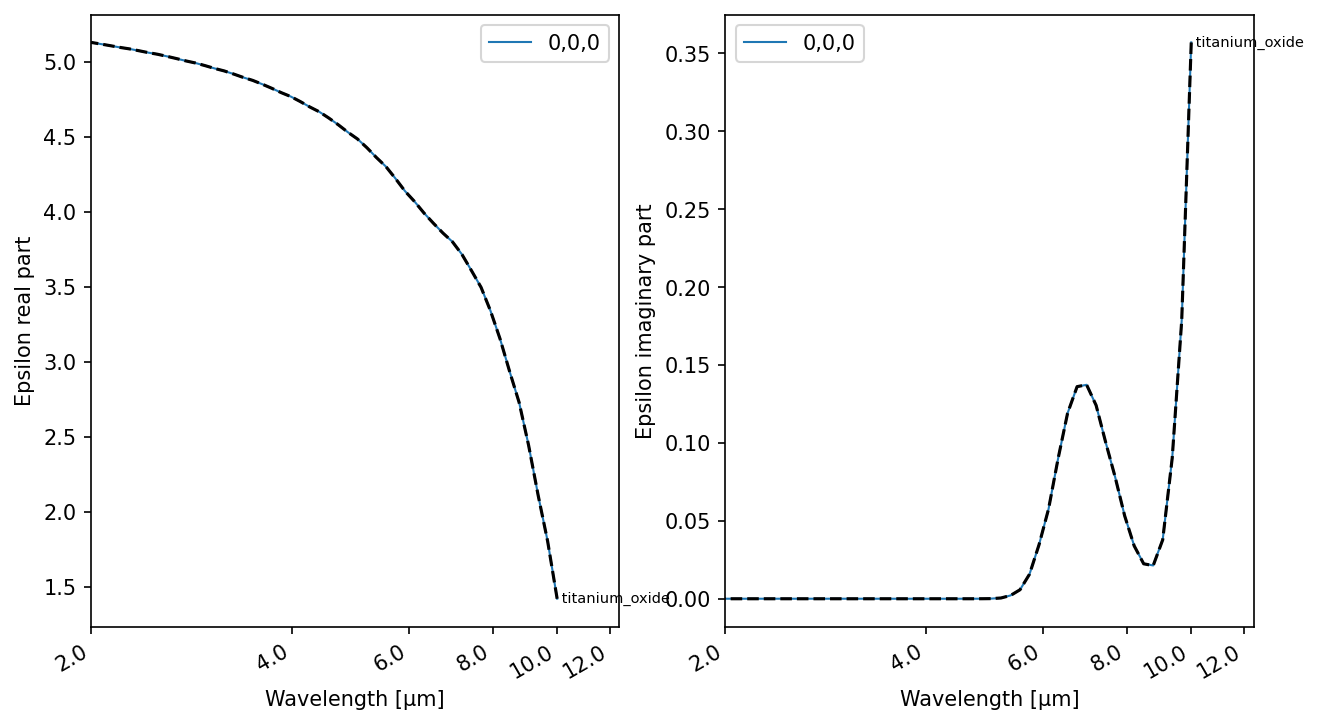

In [12]:
nidn.plot_spectra(cfg)
nidn.plot_eps_per_point(cfg)

In [13]:
cfg.name = "1layer_rcwa_class"
nidn.save_run(cfg)

09:16:50|NIDN-INFO| Saving run to file: ../results//1layer_rcwa_class_20-05-2022 09-16-50_run.pk


## Uniform 3-Layer Ground Truth 

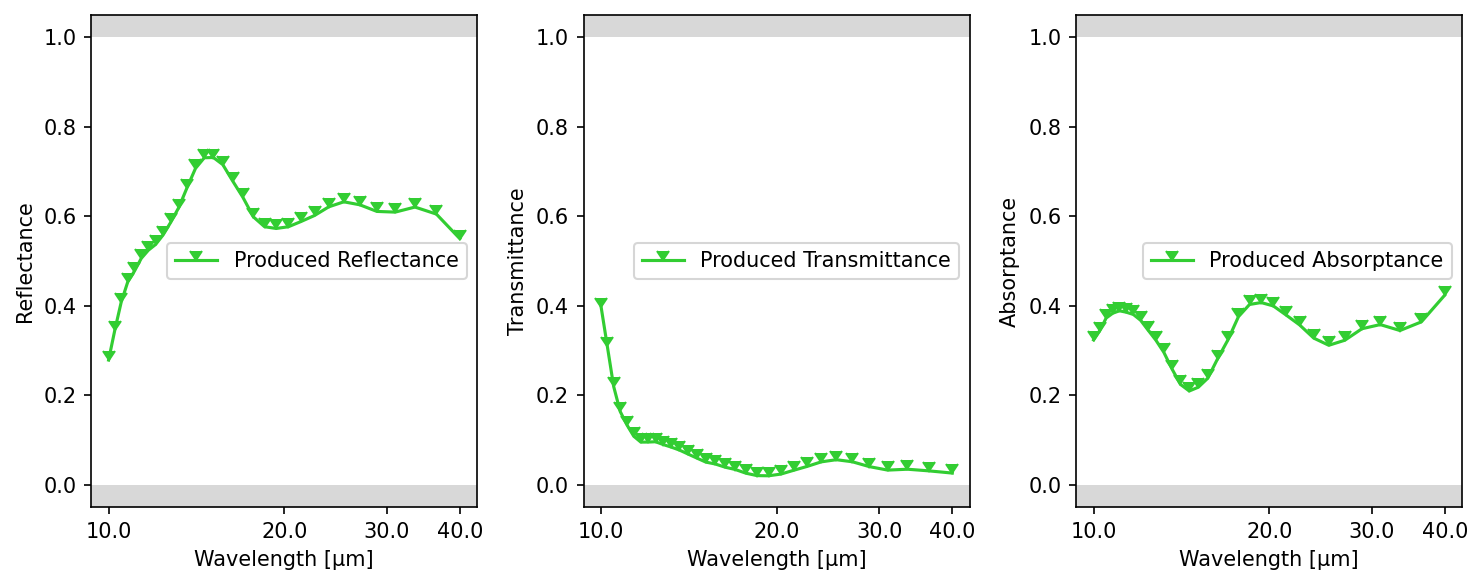

In [14]:
# Load default cfg as starting point
cfg = nidn.load_default_cfg()

# Set grid specifics
cfg.Nx = 1
cfg.Ny = 1
cfg.N_layers = 3
cfg.N_freq = 32
cfg.TRCWA_L_grid = [[1.0,0.0],[0.0,1.0]]
cfg.TRCWA_NG = 11
cfg.PER_LAYER_THICKNESS = [1.0]
cfg.freq_distribution = "linear"

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 1e-5
cfg.physical_wavelength_range[1] = 4e-5

cfg.target_reflectance_spectrum = [0.55005782,0.60496502,0.62066166,0.60937998,0.61091496,0.62573035,0.63239681,0.62117495,0.60183070,0.58843758,0.57659786,0.57282597,0.57672235,0.59860364,0.64276949,0.67916063,0.71551643,0.73145107,0.73085603,0.70710124,0.66371328,0.61967796,0.58697495,0.55837736,0.53705611,0.52416312,0.50597608,0.47726774,0.45294034,0.40777731,0.34554019,0.27880253,]
cfg.target_transmittance_spectrum = [0.02601471,0.03096245,0.03463690,0.03266956,0.04043108,0.05131611,0.05590518,0.05112020,0.04086629,0.03220691,0.02374713,0.01998344,0.02033119,0.02573320,0.03400531,0.03918298,0.04632213,0.05050779,0.05963449,0.06865844,0.07741967,0.08407922,0.08973443,0.09605149,0.09535432,0.09522754,0.10836393,0.13393469,0.16375927,0.21962809,0.30981320,0.39759293,]

nidn.plot_spectrum(cfg,
                   cfg.target_reflectance_spectrum,
                   cfg.target_transmittance_spectrum)

In [15]:
# Allowed range of epsilon values
cfg.pop("model",None); # Forget the old model
cfg.real_min_eps = -15.0
cfg.real_max_eps = 30.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 50.0

cfg.type = "regression" # Choose type as described above (for now still regression)
cfg.iterations = 2000 # Set number of training iterations (that is forward model evaluations) to perform

In [16]:
nidn.run_training(cfg);

09:16:51|NIDN-INFO| ###  New Best=0.1006 with SpectrumLoss=0.1006 ### L1=0.1006
09:16:51|NIDN-INFO| It=0     Loss=0.1006   |  weighted_avg=0.1006  |  SpectrumLoss=0.1006 | L1=0.1006
09:16:52|NIDN-INFO| ###  New Best=0.0790 with SpectrumLoss=0.0790 ### L1=0.0790
09:16:52|NIDN-INFO| ###  New Best=0.0694 with SpectrumLoss=0.0694 ### L1=0.0694
09:16:53|NIDN-INFO| ###  New Best=0.0650 with SpectrumLoss=0.0650 ### L1=0.0650
09:16:53|NIDN-INFO| ###  New Best=0.0620 with SpectrumLoss=0.0620 ### L1=0.0620
09:16:54|NIDN-INFO| ###  New Best=0.0594 with SpectrumLoss=0.0594 ### L1=0.0594
09:16:54|NIDN-INFO| It=5     Loss=0.0594   |  weighted_avg=0.0726  |  SpectrumLoss=0.0594 | L1=0.0594
09:16:54|NIDN-INFO| ###  New Best=0.0561 with SpectrumLoss=0.0561 ### L1=0.0561
09:16:54|NIDN-INFO| ###  New Best=0.0535 with SpectrumLoss=0.0535 ### L1=0.0535
09:16:55|NIDN-INFO| ###  New Best=0.0533 with SpectrumLoss=0.0533 ### L1=0.0533
09:16:56|NIDN-INFO| ###  New Best=0.0502 with SpectrumLoss=0.0502 ### L1=0.0

09:17:58|NIDN-INFO| It=130   Loss=0.0383   |  weighted_avg=0.0388  |  SpectrumLoss=0.0383 | L1=0.0383
09:17:59|NIDN-INFO| ###  New Best=0.0381 with SpectrumLoss=0.0381 ### L1=0.0381
09:18:00|NIDN-INFO| ###  New Best=0.0380 with SpectrumLoss=0.0380 ### L1=0.0380
09:18:01|NIDN-INFO| ###  New Best=0.0380 with SpectrumLoss=0.0380 ### L1=0.0380
09:18:01|NIDN-INFO| It=135   Loss=0.0380   |  weighted_avg=0.0385  |  SpectrumLoss=0.0380 | L1=0.0380
09:18:02|NIDN-INFO| ###  New Best=0.0378 with SpectrumLoss=0.0378 ### L1=0.0378
09:18:03|NIDN-INFO| It=140   Loss=0.0384   |  weighted_avg=0.0383  |  SpectrumLoss=0.0384 | L1=0.0384
09:18:06|NIDN-INFO| It=145   Loss=0.0386   |  weighted_avg=0.0382  |  SpectrumLoss=0.0386 | L1=0.0386
09:18:09|NIDN-INFO| It=150   Loss=0.0385   |  weighted_avg=0.0381  |  SpectrumLoss=0.0385 | L1=0.0385
09:18:10|NIDN-INFO| ###  New Best=0.0376 with SpectrumLoss=0.0376 ### L1=0.0376
09:18:11|NIDN-INFO| ###  New Best=0.0375 with SpectrumLoss=0.0375 ### L1=0.0375
09:18:11|N

09:19:48|NIDN-INFO| It=340   Loss=0.0359   |  weighted_avg=0.0359  |  SpectrumLoss=0.0359 | L1=0.0359
09:19:50|NIDN-INFO| It=345   Loss=0.0359   |  weighted_avg=0.0359  |  SpectrumLoss=0.0359 | L1=0.0359
09:19:51|NIDN-INFO| ###  New Best=0.0352 with SpectrumLoss=0.0352 ### L1=0.0352
09:19:53|NIDN-INFO| It=350   Loss=0.0355   |  weighted_avg=0.0357  |  SpectrumLoss=0.0355 | L1=0.0355
09:19:53|NIDN-INFO| ###  New Best=0.0352 with SpectrumLoss=0.0352 ### L1=0.0352
09:19:56|NIDN-INFO| It=355   Loss=0.0355   |  weighted_avg=0.0356  |  SpectrumLoss=0.0355 | L1=0.0355
09:19:57|NIDN-INFO| ###  New Best=0.0351 with SpectrumLoss=0.0351 ### L1=0.0351
09:19:58|NIDN-INFO| It=360   Loss=0.0351   |  weighted_avg=0.0355  |  SpectrumLoss=0.0351 | L1=0.0351
09:20:00|NIDN-INFO| ###  New Best=0.0349 with SpectrumLoss=0.0349 ### L1=0.0349
09:20:01|NIDN-INFO| It=365   Loss=0.0351   |  weighted_avg=0.0353  |  SpectrumLoss=0.0351 | L1=0.0351
09:20:03|NIDN-INFO| It=370   Loss=0.0356   |  weighted_avg=0.0353  |

09:21:55|NIDN-INFO| ###  New Best=0.0339 with SpectrumLoss=0.0339 ### L1=0.0339
09:21:56|NIDN-INFO| It=585   Loss=0.0342   |  weighted_avg=0.0341  |  SpectrumLoss=0.0342 | L1=0.0342
09:21:58|NIDN-INFO| It=590   Loss=0.0340   |  weighted_avg=0.0341  |  SpectrumLoss=0.0340 | L1=0.0340
09:21:59|NIDN-INFO| ###  New Best=0.0338 with SpectrumLoss=0.0338 ### L1=0.0338
09:22:01|NIDN-INFO| It=595   Loss=0.0343   |  weighted_avg=0.0341  |  SpectrumLoss=0.0343 | L1=0.0343
09:22:03|NIDN-INFO| It=600   Loss=0.0342   |  weighted_avg=0.0341  |  SpectrumLoss=0.0342 | L1=0.0342
09:22:06|NIDN-INFO| It=605   Loss=0.0341   |  weighted_avg=0.0342  |  SpectrumLoss=0.0341 | L1=0.0341
09:22:09|NIDN-INFO| It=610   Loss=0.0343   |  weighted_avg=0.0342  |  SpectrumLoss=0.0343 | L1=0.0343
09:22:11|NIDN-INFO| It=615   Loss=0.0340   |  weighted_avg=0.0342  |  SpectrumLoss=0.0340 | L1=0.0340
09:22:14|NIDN-INFO| It=620   Loss=0.0343   |  weighted_avg=0.0342  |  SpectrumLoss=0.0343 | L1=0.0343
09:22:16|NIDN-INFO| It=6

09:24:12|NIDN-INFO| ###  New Best=0.0331 with SpectrumLoss=0.0331 ### L1=0.0331
09:24:14|NIDN-INFO| It=850   Loss=0.0333   |  weighted_avg=0.0333  |  SpectrumLoss=0.0333 | L1=0.0333
09:24:14|NIDN-INFO| ###  New Best=0.0329 with SpectrumLoss=0.0329 ### L1=0.0329
09:24:16|NIDN-INFO| ###  New Best=0.0329 with SpectrumLoss=0.0329 ### L1=0.0329
09:24:17|NIDN-INFO| It=855   Loss=0.0332   |  weighted_avg=0.0332  |  SpectrumLoss=0.0332 | L1=0.0332
09:24:18|NIDN-INFO| ###  New Best=0.0327 with SpectrumLoss=0.0327 ### L1=0.0327
09:24:19|NIDN-INFO| It=860   Loss=0.0331   |  weighted_avg=0.0332  |  SpectrumLoss=0.0331 | L1=0.0331
09:24:21|NIDN-INFO| ###  New Best=0.0326 with SpectrumLoss=0.0326 ### L1=0.0326
09:24:21|NIDN-INFO| ###  New Best=0.0326 with SpectrumLoss=0.0326 ### L1=0.0326
09:24:22|NIDN-INFO| It=865   Loss=0.0327   |  weighted_avg=0.0330  |  SpectrumLoss=0.0327 | L1=0.0327
09:24:23|NIDN-INFO| ###  New Best=0.0323 with SpectrumLoss=0.0323 ### L1=0.0323
09:24:24|NIDN-INFO| ###  New Bes

09:25:39|NIDN-INFO| It=1015  Loss=0.0152   |  weighted_avg=0.0158  |  SpectrumLoss=0.0152 | L1=0.0152
09:25:41|NIDN-INFO| It=1020  Loss=0.0156   |  weighted_avg=0.0156  |  SpectrumLoss=0.0156 | L1=0.0156
09:25:43|NIDN-INFO| ###  New Best=0.0133 with SpectrumLoss=0.0133 ### L1=0.0133
09:25:44|NIDN-INFO| ###  New Best=0.0125 with SpectrumLoss=0.0125 ### L1=0.0125
09:25:44|NIDN-INFO| It=1025  Loss=0.0125   |  weighted_avg=0.0149  |  SpectrumLoss=0.0125 | L1=0.0125
09:25:47|NIDN-INFO| It=1030  Loss=0.0139   |  weighted_avg=0.0147  |  SpectrumLoss=0.0139 | L1=0.0139
09:25:47|NIDN-INFO| ###  New Best=0.0121 with SpectrumLoss=0.0121 ### L1=0.0121
09:25:49|NIDN-INFO| It=1035  Loss=0.0140   |  weighted_avg=0.0142  |  SpectrumLoss=0.0140 | L1=0.0140
09:25:52|NIDN-INFO| It=1040  Loss=0.0130   |  weighted_avg=0.0137  |  SpectrumLoss=0.0130 | L1=0.0130
09:25:54|NIDN-INFO| ###  New Best=0.0115 with SpectrumLoss=0.0115 ### L1=0.0115
09:25:54|NIDN-INFO| It=1045  Loss=0.0123   |  weighted_avg=0.0134  |

09:27:43|NIDN-INFO| It=1255  Loss=0.0087   |  weighted_avg=0.0088  |  SpectrumLoss=0.0087 | L1=0.0087
09:27:46|NIDN-INFO| ###  New Best=0.0079 with SpectrumLoss=0.0079 ### L1=0.0079
09:27:46|NIDN-INFO| ###  New Best=0.0076 with SpectrumLoss=0.0076 ### L1=0.0076
09:27:46|NIDN-INFO| It=1260  Loss=0.0076   |  weighted_avg=0.0086  |  SpectrumLoss=0.0076 | L1=0.0076
09:27:49|NIDN-INFO| ###  New Best=0.0075 with SpectrumLoss=0.0075 ### L1=0.0075
09:27:49|NIDN-INFO| It=1265  Loss=0.0075   |  weighted_avg=0.0084  |  SpectrumLoss=0.0075 | L1=0.0075
09:27:51|NIDN-INFO| It=1270  Loss=0.0080   |  weighted_avg=0.0082  |  SpectrumLoss=0.0080 | L1=0.0080
09:27:54|NIDN-INFO| It=1275  Loss=0.0081   |  weighted_avg=0.0081  |  SpectrumLoss=0.0081 | L1=0.0081
09:27:56|NIDN-INFO| It=1280  Loss=0.0078   |  weighted_avg=0.0080  |  SpectrumLoss=0.0078 | L1=0.0078
09:27:58|NIDN-INFO| ###  New Best=0.0074 with SpectrumLoss=0.0074 ### L1=0.0074
09:27:59|NIDN-INFO| It=1285  Loss=0.0074   |  weighted_avg=0.0080  |

09:30:10|NIDN-INFO| It=1540  Loss=0.0073   |  weighted_avg=0.0076  |  SpectrumLoss=0.0073 | L1=0.0073
09:30:13|NIDN-INFO| It=1545  Loss=0.0068   |  weighted_avg=0.0074  |  SpectrumLoss=0.0068 | L1=0.0068
09:30:15|NIDN-INFO| It=1550  Loss=0.0071   |  weighted_avg=0.0073  |  SpectrumLoss=0.0071 | L1=0.0071
09:30:18|NIDN-INFO| It=1555  Loss=0.0070   |  weighted_avg=0.0072  |  SpectrumLoss=0.0070 | L1=0.0070
09:30:21|NIDN-INFO| It=1560  Loss=0.0070   |  weighted_avg=0.0072  |  SpectrumLoss=0.0070 | L1=0.0070
09:30:23|NIDN-INFO| It=1565  Loss=0.0071   |  weighted_avg=0.0073  |  SpectrumLoss=0.0071 | L1=0.0071
09:30:26|NIDN-INFO| It=1570  Loss=0.0073   |  weighted_avg=0.0073  |  SpectrumLoss=0.0073 | L1=0.0073
09:30:28|NIDN-INFO| It=1575  Loss=0.0076   |  weighted_avg=0.0074  |  SpectrumLoss=0.0076 | L1=0.0076
09:30:31|NIDN-INFO| It=1580  Loss=0.0072   |  weighted_avg=0.0074  |  SpectrumLoss=0.0072 | L1=0.0072
09:30:33|NIDN-INFO| It=1585  Loss=0.0072   |  weighted_avg=0.0074  |  SpectrumLoss

09:32:53|NIDN-INFO| It=1855  Loss=0.0071   |  weighted_avg=0.0071  |  SpectrumLoss=0.0071 | L1=0.0071
09:32:56|NIDN-INFO| It=1860  Loss=0.0071   |  weighted_avg=0.0070  |  SpectrumLoss=0.0071 | L1=0.0071
09:32:59|NIDN-INFO| It=1865  Loss=0.0070   |  weighted_avg=0.0070  |  SpectrumLoss=0.0070 | L1=0.0070
09:33:01|NIDN-INFO| It=1870  Loss=0.0071   |  weighted_avg=0.0070  |  SpectrumLoss=0.0071 | L1=0.0071
09:33:04|NIDN-INFO| It=1875  Loss=0.0069   |  weighted_avg=0.0070  |  SpectrumLoss=0.0069 | L1=0.0069
09:33:06|NIDN-INFO| It=1880  Loss=0.0069   |  weighted_avg=0.0070  |  SpectrumLoss=0.0069 | L1=0.0069
09:33:09|NIDN-INFO| It=1885  Loss=0.0070   |  weighted_avg=0.0069  |  SpectrumLoss=0.0070 | L1=0.0070
09:33:10|NIDN-INFO| ###  New Best=0.0066 with SpectrumLoss=0.0066 ### L1=0.0066
09:33:12|NIDN-INFO| It=1890  Loss=0.0068   |  weighted_avg=0.0069  |  SpectrumLoss=0.0068 | L1=0.0068
09:33:14|NIDN-INFO| It=1895  Loss=0.0069   |  weighted_avg=0.0069  |  SpectrumLoss=0.0069 | L1=0.0069
09

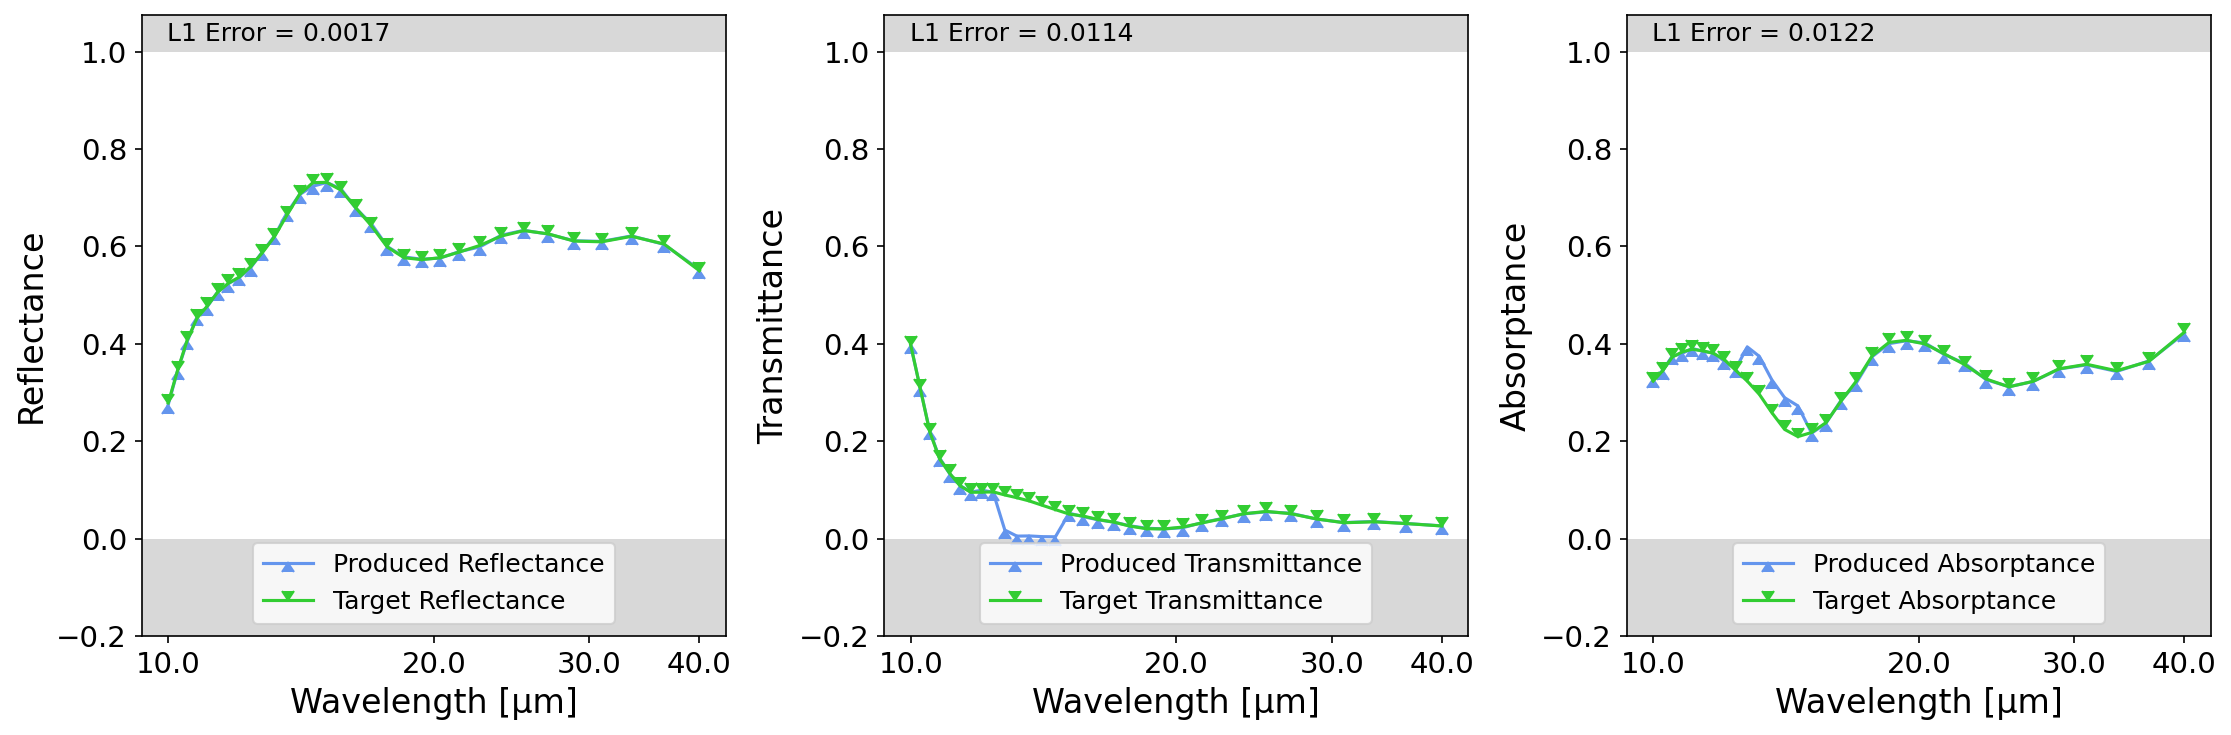

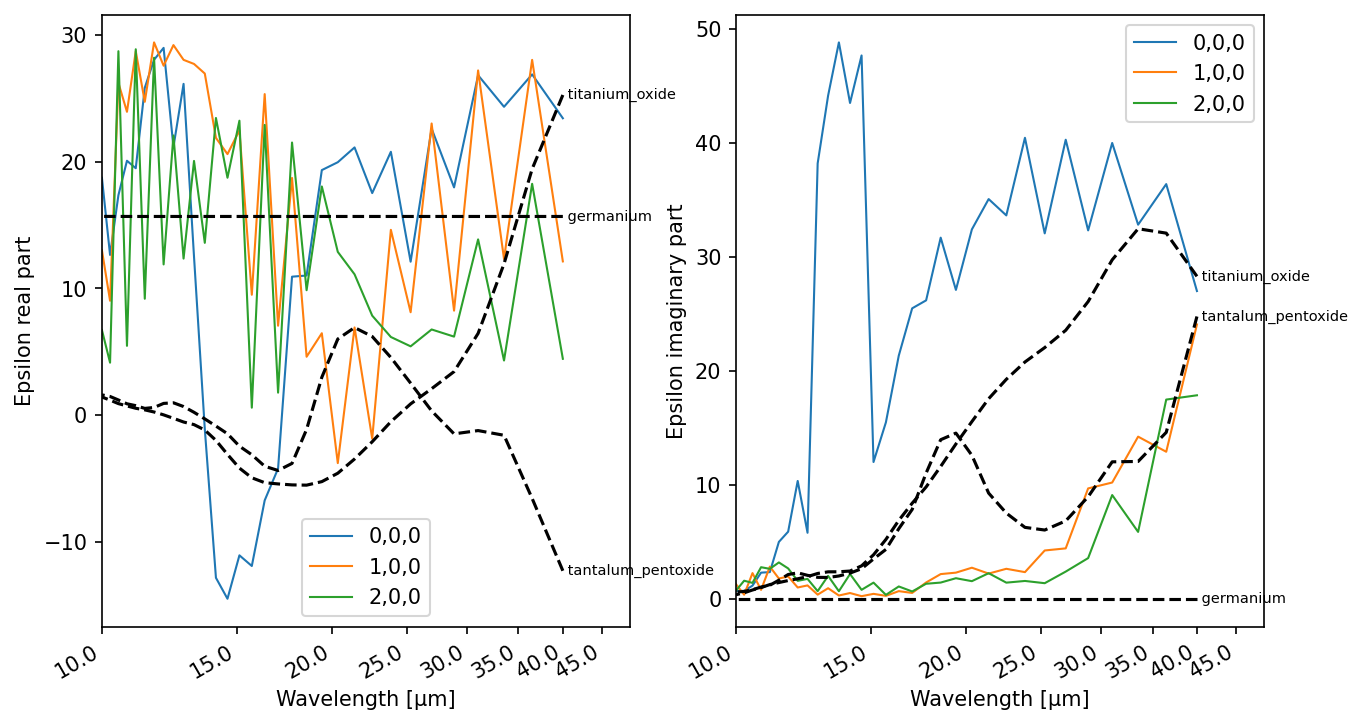

In [17]:
# The other plots
nidn.plot_spectra(cfg)
nidn.plot_eps_per_point(cfg,compare_to_material=["titanium_oxide","germanium","tantalum_pentoxide"])

In [18]:
cfg.name = "3layer_rcwa_reg"
nidn.save_run(cfg)

09:34:10|NIDN-INFO| Saving run to file: ../results//3layer_rcwa_reg_20-05-2022 09-34-10_run.pk


In [19]:
# Allowed range of epsilon values
cfg.pop("model",None); # Forget the old model

cfg.type = "classification" # Choose type as described above (for now still regression)
cfg.iterations = 1000 # Set number of training iterations (that is forward model evaluations) to perform

In [20]:
nidn.run_training(cfg);

09:34:11|NIDN-INFO| ###  New Best=0.2367 with SpectrumLoss=0.2323 ### L1=0.2323
09:34:11|NIDN-INFO| It=0     Loss=0.2367   |  weighted_avg=0.2367  |  SpectrumLoss=0.2323 | L1=0.2323
09:34:11|NIDN-INFO| ###  New Best=0.1828 with SpectrumLoss=0.1789 ### L1=0.1789
09:34:12|NIDN-INFO| ###  New Best=0.1389 with SpectrumLoss=0.1356 ### L1=0.1356
09:34:12|NIDN-INFO| ###  New Best=0.1170 with SpectrumLoss=0.1138 ### L1=0.1138
09:34:13|NIDN-INFO| ###  New Best=0.1065 with SpectrumLoss=0.1033 ### L1=0.1033
09:34:13|NIDN-INFO| ###  New Best=0.0968 with SpectrumLoss=0.0937 ### L1=0.0937
09:34:13|NIDN-INFO| It=5     Loss=0.0968   |  weighted_avg=0.1465  |  SpectrumLoss=0.0937 | L1=0.0937
09:34:14|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0830 ### L1=0.0830
09:34:14|NIDN-INFO| ###  New Best=0.0769 with SpectrumLoss=0.0743 ### L1=0.0743
09:34:15|NIDN-INFO| ###  New Best=0.0722 with SpectrumLoss=0.0698 ### L1=0.0698
09:34:15|NIDN-INFO| ###  New Best=0.0693 with SpectrumLoss=0.0673 ### L1=0.0

09:34:44|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0009 ### L1=0.0009
09:34:44|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0009 ### L1=0.0009
09:34:45|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0008 ### L1=0.0008
09:34:45|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0008 ### L1=0.0008
09:34:45|NIDN-INFO| It=65    Loss=0.0009   |  weighted_avg=0.0011  |  SpectrumLoss=0.0008 | L1=0.0008
09:34:46|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0008 ### L1=0.0008
09:34:46|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0008 ### L1=0.0008
09:34:47|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0008 ### L1=0.0008
09:34:47|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
09:34:48|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
09:34:48|NIDN-INFO| It=70    Loss=0.0008   |  weighted_avg=0.0010  |  SpectrumLoss=0.0008 | L1=0.0008
09:34:48|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0

09:35:17|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0005 ### L1=0.0005
09:35:17|NIDN-INFO| It=125   Loss=0.0005   |  weighted_avg=0.0005  |  SpectrumLoss=0.0005 | L1=0.0005
09:35:17|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
09:35:18|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
09:35:18|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
09:35:19|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
09:35:20|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
09:35:20|NIDN-INFO| It=130   Loss=0.0005   |  weighted_avg=0.0005  |  SpectrumLoss=0.0004 | L1=0.0004
09:35:20|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
09:35:21|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
09:35:21|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
09:35:22|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0

09:35:49|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
09:35:50|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
09:35:51|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
09:35:51|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
09:35:51|NIDN-INFO| It=190   Loss=0.0003   |  weighted_avg=0.0004  |  SpectrumLoss=0.0003 | L1=0.0003
09:35:52|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
09:35:52|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
09:35:53|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
09:35:53|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
09:35:54|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
09:35:54|NIDN-INFO| It=195   Loss=0.0003   |  weighted_avg=0.0004  |  SpectrumLoss=0.0003 | L1=0.0003
09:35:54|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0

09:36:21|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
09:36:21|NIDN-INFO| It=250   Loss=0.0003   |  weighted_avg=0.0003  |  SpectrumLoss=0.0003 | L1=0.0003
09:36:21|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
09:36:22|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
09:36:22|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
09:36:23|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
09:36:23|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
09:36:23|NIDN-INFO| It=255   Loss=0.0003   |  weighted_avg=0.0003  |  SpectrumLoss=0.0002 | L1=0.0002
09:36:24|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
09:36:24|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
09:36:25|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
09:36:25|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0

09:36:53|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:36:54|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:36:55|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:36:55|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:36:55|NIDN-INFO| It=315   Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
09:36:56|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:36:56|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:36:57|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:36:57|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:36:58|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:36:58|NIDN-INFO| It=320   Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
09:36:58|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0

09:37:26|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:37:26|NIDN-INFO| It=375   Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
09:37:27|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:37:27|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:37:28|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:37:28|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:37:29|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:37:29|NIDN-INFO| It=380   Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
09:37:29|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:37:30|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:37:30|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
09:37:31|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0

09:37:58|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
09:37:59|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
09:37:59|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
09:38:00|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
09:38:00|NIDN-INFO| It=440   Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0001 | L1=0.0001
09:38:00|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
09:38:01|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
09:38:02|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
09:38:02|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
09:38:03|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
09:38:03|NIDN-INFO| It=445   Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0001 | L1=0.0001
09:38:03|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0

09:38:31|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:38:31|NIDN-INFO| It=500   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:38:32|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:38:32|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:38:33|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:38:33|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:38:34|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:38:34|NIDN-INFO| It=505   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:38:34|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:38:35|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:38:35|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:38:36|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

09:39:03|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:04|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:04|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:05|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:05|NIDN-INFO| It=565   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:39:06|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:06|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:07|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:07|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:08|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:08|NIDN-INFO| It=570   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:39:08|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

09:39:37|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:37|NIDN-INFO| It=625   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:39:37|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:38|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:38|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:39|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:39|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:39|NIDN-INFO| It=630   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:39:40|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:41|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:41|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:39:42|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

09:40:10|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:11|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:11|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:12|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:12|NIDN-INFO| It=690   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:40:12|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:13|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:13|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:14|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:14|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:14|NIDN-INFO| It=695   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:40:15|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

09:40:43|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:43|NIDN-INFO| It=750   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:40:43|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:44|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:44|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:45|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:45|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:45|NIDN-INFO| It=755   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:40:46|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:46|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:47|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:40:47|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

09:41:15|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:15|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:16|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:16|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:16|NIDN-INFO| It=815   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:41:17|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:17|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:18|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:18|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:19|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:19|NIDN-INFO| It=820   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:41:19|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

09:41:48|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:48|NIDN-INFO| It=875   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:41:49|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:49|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:50|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:50|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:50|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:50|NIDN-INFO| It=880   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:41:51|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:52|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:52|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:41:53|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

09:42:21|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:42:21|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:42:22|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:42:22|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:42:22|NIDN-INFO| It=940   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:42:23|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:42:23|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:42:24|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:42:24|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:42:25|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
09:42:25|NIDN-INFO| It=945   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
09:42:25|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

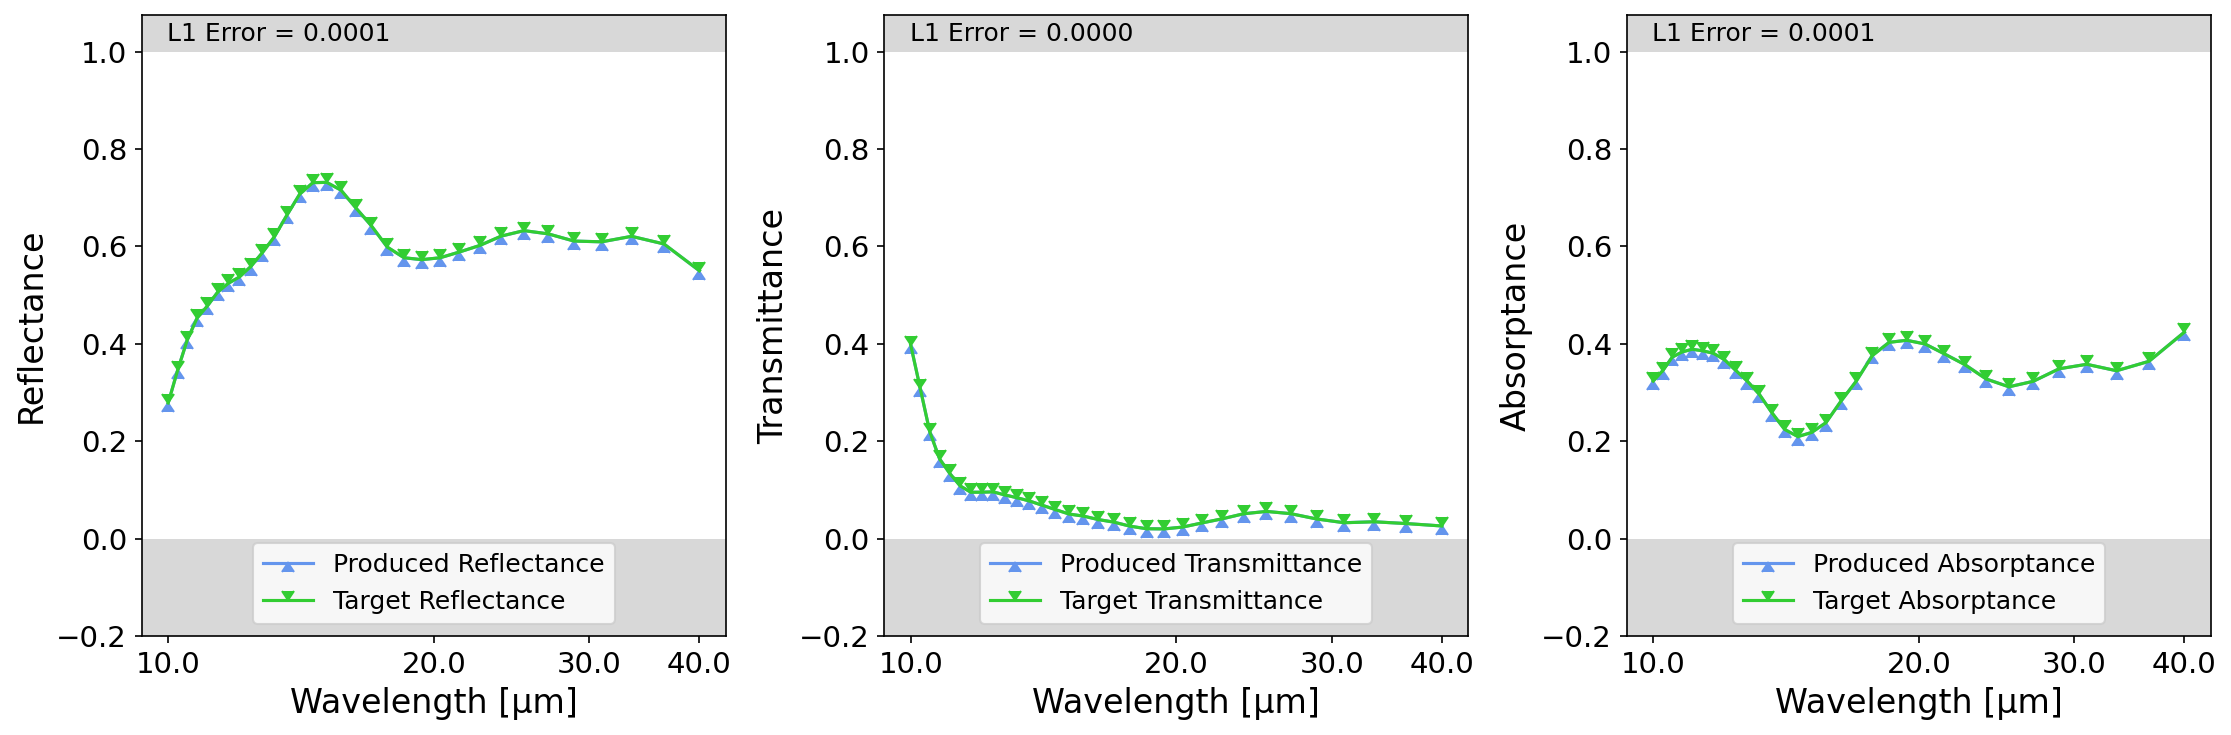

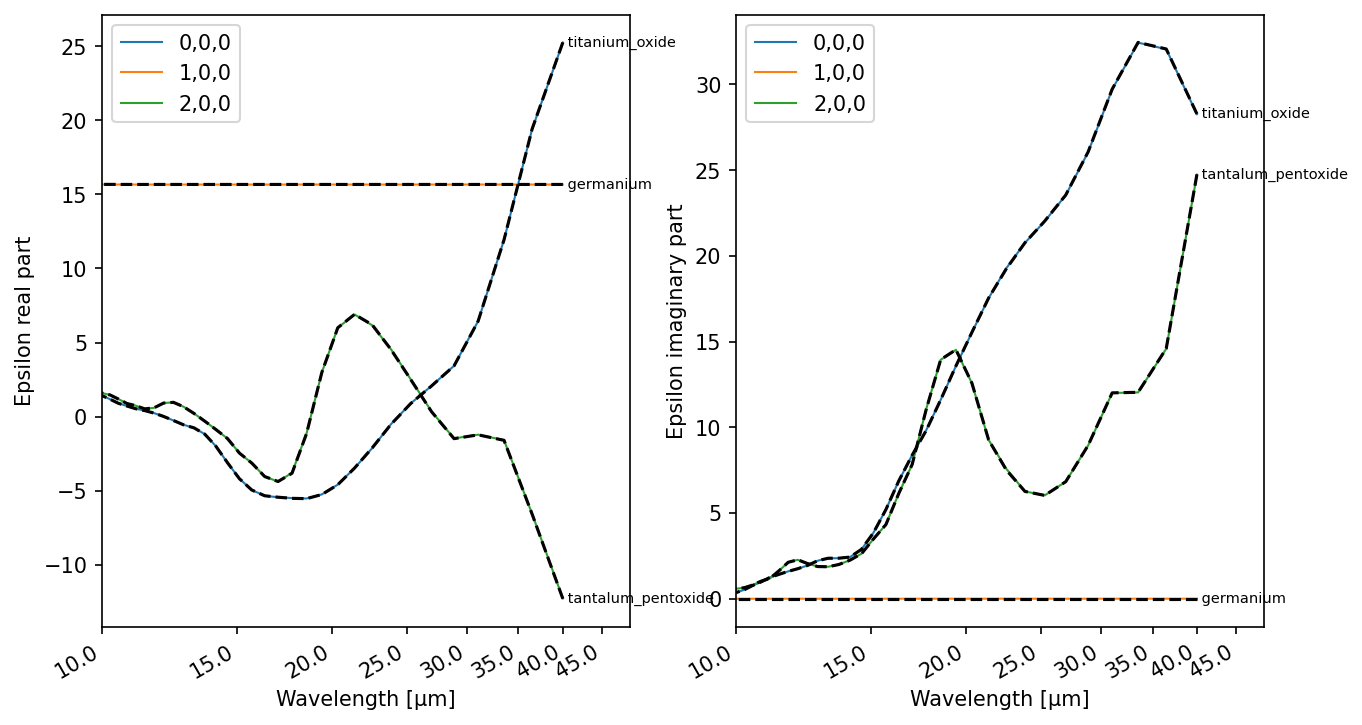

In [21]:
# The other plots
nidn.plot_spectra(cfg)
nidn.plot_eps_per_point(cfg,compare_to_material=["titanium_oxide","germanium","tantalum_pentoxide"])

In [22]:
cfg.name = "3layer_rcwa_class"
nidn.save_run(cfg)

09:42:56|NIDN-INFO| Saving run to file: ../results//3layer_rcwa_class_20-05-2022 09-42-56_run.pk


## Patterned 2-Layer Ground-truth  

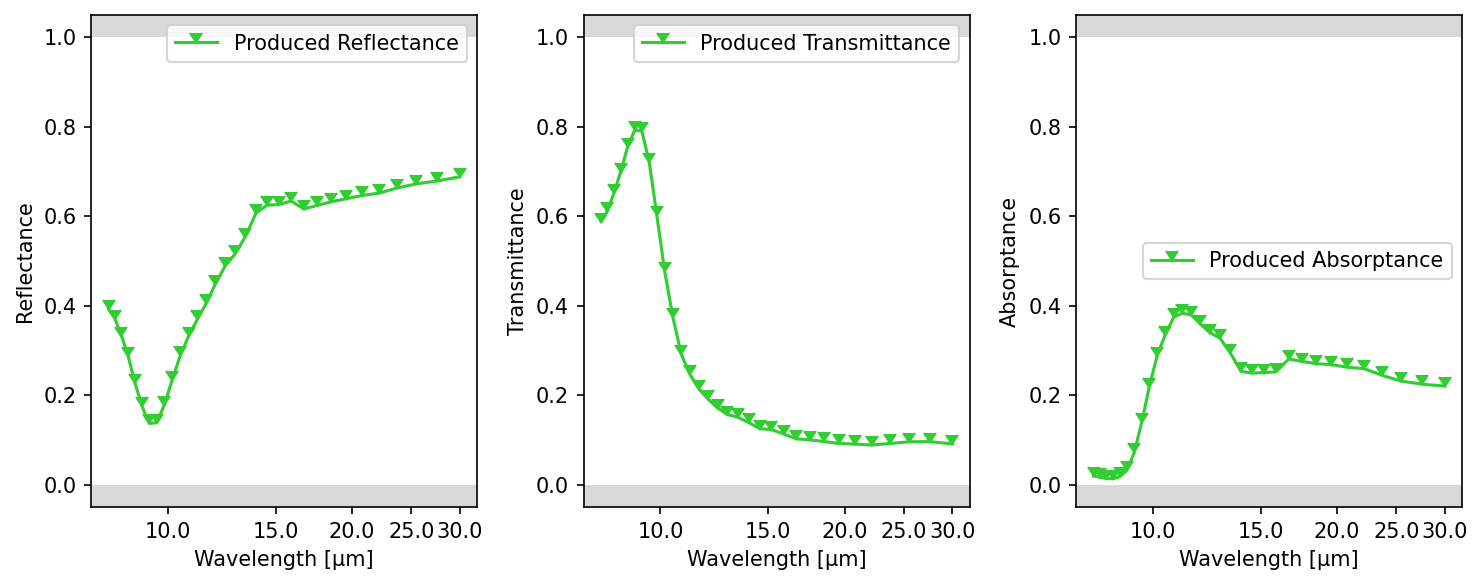

In [23]:
# Start with the default config
cfg = nidn.load_default_cfg()

# Set grid specifics
cfg.Nx = 9
cfg.Ny = 9
cfg.N_layers = 2
cfg.N_freq = 32
cfg.TRCWA_L_grid = [[1.0,0.0],[0.0,1.0]]
cfg.TRCWA_NG = 11
cfg.PER_LAYER_THICKNESS = [1.0]
cfg.freq_distribution = "linear"
cfg.eps_oversampling = 3

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 8e-6
cfg.physical_wavelength_range[1] = 3e-5

cfg.target_reflectance_spectrum = [0.68828081,0.67902203,0.67254449,0.66336273,0.65189523,0.64654359,0.63939401,0.63271241,0.62439366,0.61628131,0.63422217,0.62606380,0.62500825,0.60722824,0.55416427,0.51557739,0.48864278,0.44927543,0.40555089,0.36949881,0.33302381,0.28887292,0.23453777,0.17855517,0.13872936,0.13701113,0.17538042,0.22712094,0.28762694,0.33341107,0.37140055,0.39226625,]
cfg.target_transmittance_spectrum = [0.09127810,0.09634265,0.09588768,0.09216599,0.08871714,0.09077894,0.09216121,0.09673880,0.10026712,0.10257377,0.11336114,0.12332778,0.12537304,0.13925786,0.15096161,0.15686451,0.17153857,0.19164363,0.21466734,0.24704620,0.29248742,0.37537087,0.47662882,0.60192663,0.72188167,0.79082127,0.79187421,0.75442068,0.69888141,0.65274581,0.61179944,0.58826904,]
nidn.plot_spectrum(cfg,
                   cfg.target_reflectance_spectrum,
                   cfg.target_transmittance_spectrum)

In [24]:
# Allowed range of epsilon values
cfg.pop("model",None); # Forget the old model
cfg.real_min_eps = -10.0
cfg.real_max_eps = 20.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 30.0

cfg.type = "regression" # Choose type as described above (for now still regression)
cfg.iterations = 1000 # Set number of training iterations (that is forward model evaluations) to perform

In [25]:
nidn.run_training(cfg);

09:42:59|NIDN-INFO| ###  New Best=0.2128 with SpectrumLoss=0.2128 ### L1=0.2128
09:42:59|NIDN-INFO| It=0     Loss=0.2128   |  weighted_avg=0.2128  |  SpectrumLoss=0.2128 | L1=0.2128
09:43:01|NIDN-INFO| ###  New Best=0.1928 with SpectrumLoss=0.1928 ### L1=0.1928
09:43:03|NIDN-INFO| ###  New Best=0.1820 with SpectrumLoss=0.1820 ### L1=0.1820
09:43:04|NIDN-INFO| ###  New Best=0.1733 with SpectrumLoss=0.1733 ### L1=0.1733
09:43:06|NIDN-INFO| ###  New Best=0.1680 with SpectrumLoss=0.1680 ### L1=0.1680
09:43:08|NIDN-INFO| ###  New Best=0.1644 with SpectrumLoss=0.1644 ### L1=0.1644
09:43:08|NIDN-INFO| It=5     Loss=0.1644   |  weighted_avg=0.1822  |  SpectrumLoss=0.1644 | L1=0.1644
09:43:10|NIDN-INFO| ###  New Best=0.1608 with SpectrumLoss=0.1608 ### L1=0.1608
09:43:14|NIDN-INFO| ###  New Best=0.1607 with SpectrumLoss=0.1607 ### L1=0.1607
09:43:16|NIDN-INFO| ###  New Best=0.1593 with SpectrumLoss=0.1593 ### L1=0.1593
09:43:18|NIDN-INFO| ###  New Best=0.1568 with SpectrumLoss=0.1568 ### L1=0.1

09:45:22|NIDN-INFO| It=75    Loss=0.0530   |  weighted_avg=0.0715  |  SpectrumLoss=0.0530 | L1=0.0530
09:45:24|NIDN-INFO| ###  New Best=0.0506 with SpectrumLoss=0.0506 ### L1=0.0506
09:45:26|NIDN-INFO| ###  New Best=0.0490 with SpectrumLoss=0.0490 ### L1=0.0490
09:45:32|NIDN-INFO| It=80    Loss=0.0512   |  weighted_avg=0.0632  |  SpectrumLoss=0.0512 | L1=0.0512
09:45:36|NIDN-INFO| ###  New Best=0.0484 with SpectrumLoss=0.0484 ### L1=0.0484
09:45:38|NIDN-INFO| ###  New Best=0.0467 with SpectrumLoss=0.0467 ### L1=0.0467
09:45:40|NIDN-INFO| ###  New Best=0.0453 with SpectrumLoss=0.0453 ### L1=0.0453
09:45:42|NIDN-INFO| It=85    Loss=0.0502   |  weighted_avg=0.0561  |  SpectrumLoss=0.0502 | L1=0.0502
09:45:51|NIDN-INFO| It=90    Loss=0.0484   |  weighted_avg=0.0510  |  SpectrumLoss=0.0484 | L1=0.0484
09:45:53|NIDN-INFO| ###  New Best=0.0437 with SpectrumLoss=0.0437 ### L1=0.0437
09:45:57|NIDN-INFO| ###  New Best=0.0413 with SpectrumLoss=0.0413 ### L1=0.0413
09:45:59|NIDN-INFO| ###  New Bes

09:50:02|NIDN-INFO| It=220   Loss=0.0095   |  weighted_avg=0.0104  |  SpectrumLoss=0.0095 | L1=0.0095
09:50:08|NIDN-INFO| ###  New Best=0.0088 with SpectrumLoss=0.0088 ### L1=0.0088
09:50:12|NIDN-INFO| It=225   Loss=0.0089   |  weighted_avg=0.0102  |  SpectrumLoss=0.0089 | L1=0.0089
09:50:14|NIDN-INFO| ###  New Best=0.0083 with SpectrumLoss=0.0083 ### L1=0.0083
09:50:21|NIDN-INFO| ###  New Best=0.0079 with SpectrumLoss=0.0079 ### L1=0.0079
09:50:21|NIDN-INFO| It=230   Loss=0.0079   |  weighted_avg=0.0098  |  SpectrumLoss=0.0079 | L1=0.0079
09:50:31|NIDN-INFO| ###  New Best=0.0076 with SpectrumLoss=0.0076 ### L1=0.0076
09:50:31|NIDN-INFO| It=235   Loss=0.0076   |  weighted_avg=0.0093  |  SpectrumLoss=0.0076 | L1=0.0076
09:50:37|NIDN-INFO| ###  New Best=0.0075 with SpectrumLoss=0.0075 ### L1=0.0075
09:50:40|NIDN-INFO| It=240   Loss=0.0082   |  weighted_avg=0.0088  |  SpectrumLoss=0.0082 | L1=0.0082
09:50:49|NIDN-INFO| It=245   Loss=0.0091   |  weighted_avg=0.0088  |  SpectrumLoss=0.0091 

09:57:58|NIDN-INFO| It=470   Loss=0.0072   |  weighted_avg=0.0064  |  SpectrumLoss=0.0072 | L1=0.0072
09:58:07|NIDN-INFO| It=475   Loss=0.0067   |  weighted_avg=0.0065  |  SpectrumLoss=0.0067 | L1=0.0067
09:58:17|NIDN-INFO| It=480   Loss=0.0097   |  weighted_avg=0.0068  |  SpectrumLoss=0.0097 | L1=0.0097
09:58:27|NIDN-INFO| It=485   Loss=0.0089   |  weighted_avg=0.0074  |  SpectrumLoss=0.0089 | L1=0.0089
09:58:37|NIDN-INFO| It=490   Loss=0.0069   |  weighted_avg=0.0078  |  SpectrumLoss=0.0069 | L1=0.0069
09:58:46|NIDN-INFO| It=495   Loss=0.0071   |  weighted_avg=0.0080  |  SpectrumLoss=0.0071 | L1=0.0071
09:58:56|NIDN-INFO| It=500   Loss=0.0076   |  weighted_avg=0.0076  |  SpectrumLoss=0.0076 | L1=0.0076
09:59:06|NIDN-INFO| ###  New Best=0.0048 with SpectrumLoss=0.0048 ### L1=0.0048
09:59:06|NIDN-INFO| It=505   Loss=0.0048   |  weighted_avg=0.0071  |  SpectrumLoss=0.0048 | L1=0.0048
09:59:16|NIDN-INFO| ###  New Best=0.0043 with SpectrumLoss=0.0043 ### L1=0.0043
09:59:16|NIDN-INFO| It=5

10:07:25|NIDN-INFO| It=765   Loss=0.0045   |  weighted_avg=0.0052  |  SpectrumLoss=0.0045 | L1=0.0045
10:07:35|NIDN-INFO| It=770   Loss=0.0042   |  weighted_avg=0.0048  |  SpectrumLoss=0.0042 | L1=0.0042
10:07:45|NIDN-INFO| It=775   Loss=0.0050   |  weighted_avg=0.0046  |  SpectrumLoss=0.0050 | L1=0.0050
10:07:54|NIDN-INFO| It=780   Loss=0.0040   |  weighted_avg=0.0045  |  SpectrumLoss=0.0040 | L1=0.0040
10:08:04|NIDN-INFO| It=785   Loss=0.0045   |  weighted_avg=0.0045  |  SpectrumLoss=0.0045 | L1=0.0045
10:08:13|NIDN-INFO| It=790   Loss=0.0058   |  weighted_avg=0.0045  |  SpectrumLoss=0.0058 | L1=0.0058
10:08:22|NIDN-INFO| It=795   Loss=0.0043   |  weighted_avg=0.0045  |  SpectrumLoss=0.0043 | L1=0.0043
10:08:31|NIDN-INFO| It=800   Loss=0.0040   |  weighted_avg=0.0047  |  SpectrumLoss=0.0040 | L1=0.0040
10:08:40|NIDN-INFO| It=805   Loss=0.0040   |  weighted_avg=0.0047  |  SpectrumLoss=0.0040 | L1=0.0040
10:08:49|NIDN-INFO| It=810   Loss=0.0042   |  weighted_avg=0.0046  |  SpectrumLoss

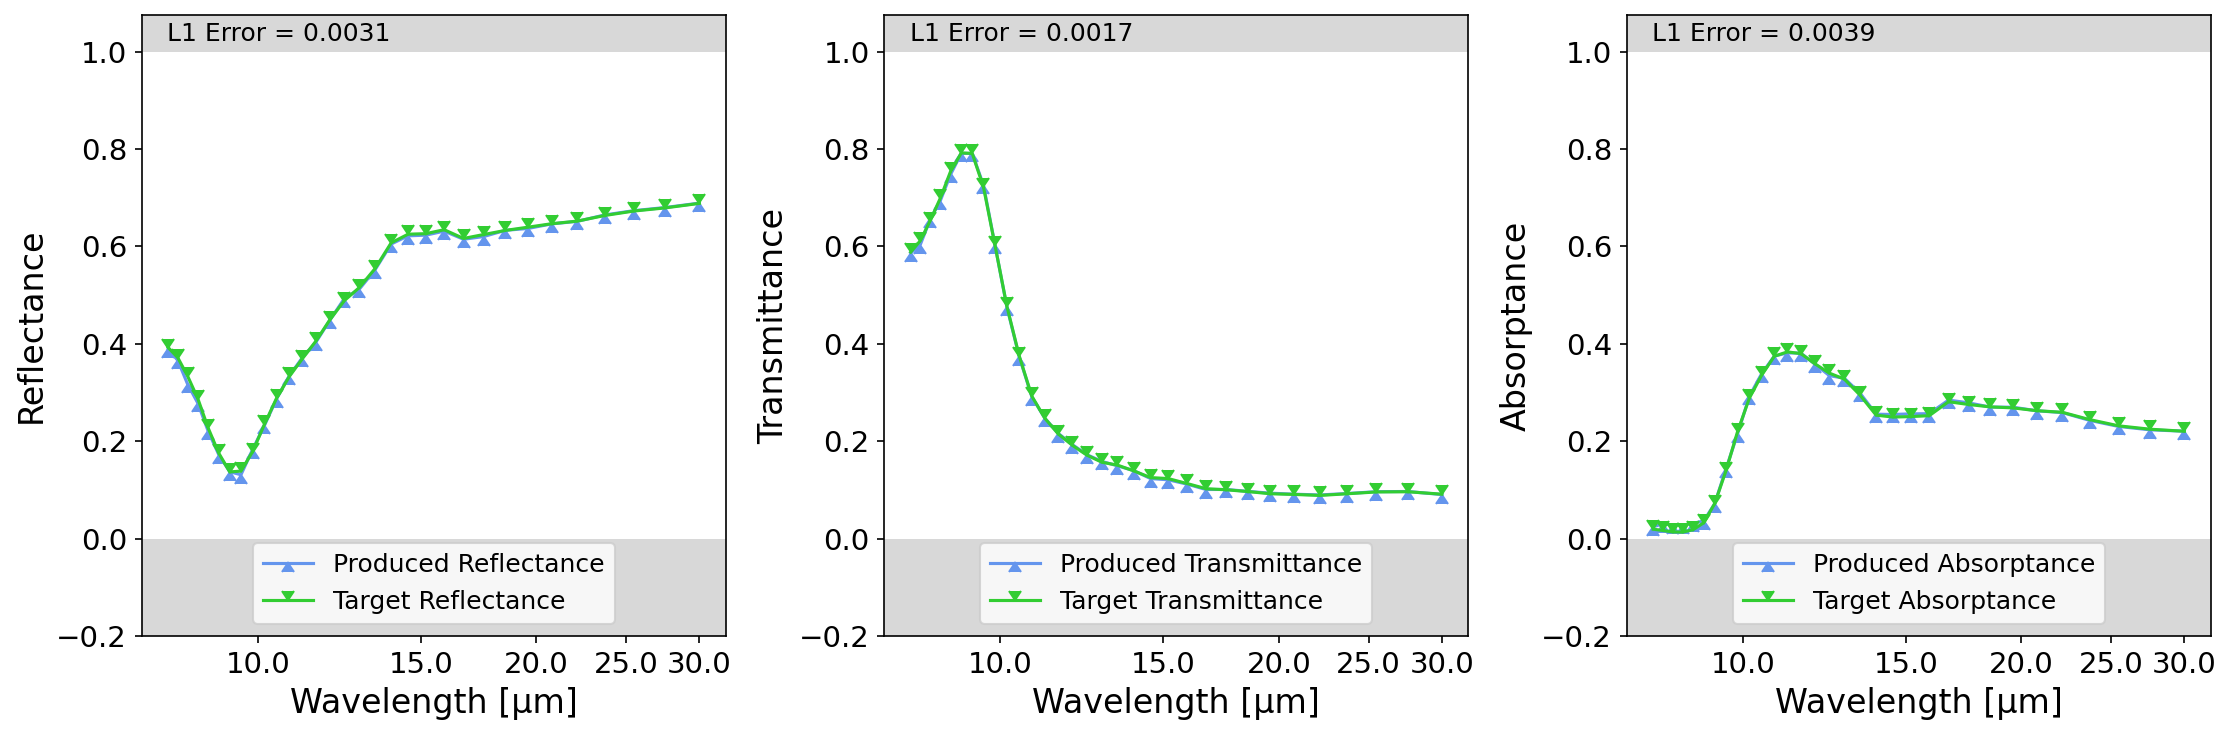

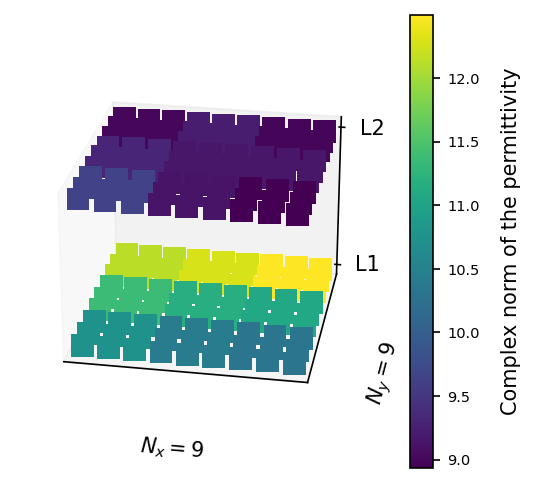

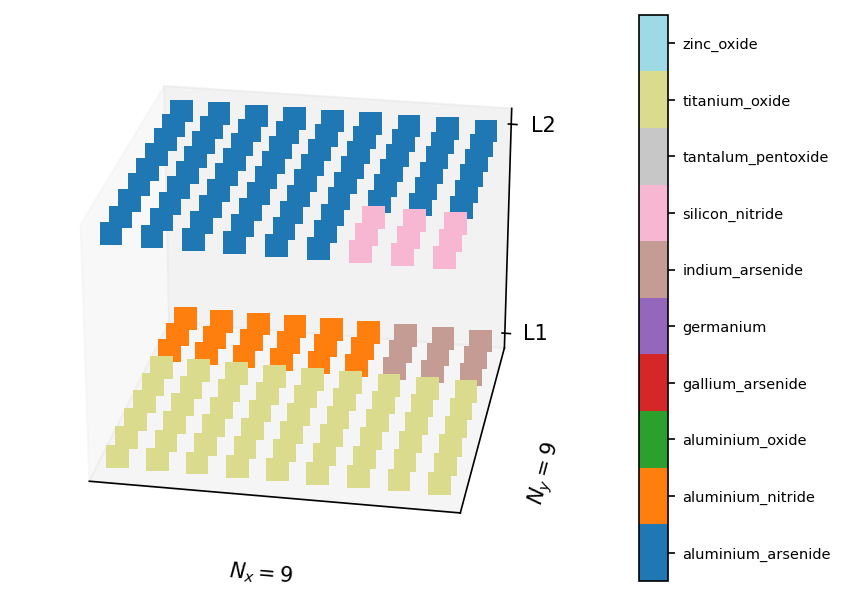

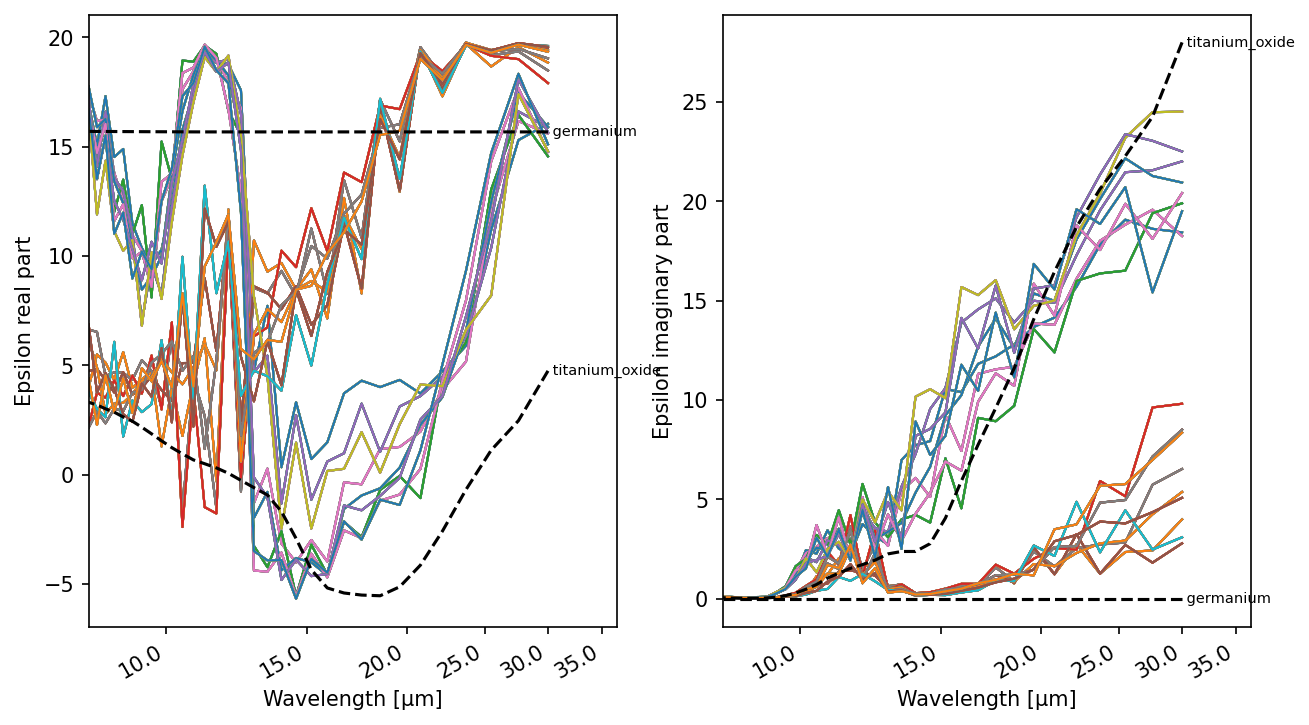

In [26]:
# The other plots
nidn.plot_spectra(cfg)
nidn.plot_model_grid(cfg)
nidn.plot_material_grid(cfg)
nidn.plot_eps_per_point(cfg,compare_to_material=["titanium_oxide","germanium"],legend=False)

In [27]:
cfg.name = "2pattern_rcwa_reg"
nidn.save_run(cfg)

10:15:00|NIDN-INFO| Saving run to file: ../results//2pattern_rcwa_reg_20-05-2022 10-15-00_run.pk


In [28]:
# Allowed range of epsilon values
cfg.pop("model",None); # Forget the old model

cfg.type = "classification" # Choose type as described above (for now still regression)
cfg.iterations = 1000 # Set number of training iterations (that is forward model evaluations) to perform

In [29]:
nidn.run_training(cfg);

10:15:02|NIDN-INFO| ###  New Best=0.1642 with SpectrumLoss=0.1598 ### L1=0.1598
10:15:02|NIDN-INFO| It=0     Loss=0.1642   |  weighted_avg=0.1642  |  SpectrumLoss=0.1598 | L1=0.1598
10:15:04|NIDN-INFO| ###  New Best=0.1499 with SpectrumLoss=0.1453 ### L1=0.1453
10:15:06|NIDN-INFO| ###  New Best=0.1349 with SpectrumLoss=0.1302 ### L1=0.1302
10:15:08|NIDN-INFO| ###  New Best=0.1309 with SpectrumLoss=0.1263 ### L1=0.1263
10:15:10|NIDN-INFO| ###  New Best=0.1174 with SpectrumLoss=0.1130 ### L1=0.1130
10:15:11|NIDN-INFO| ###  New Best=0.0990 with SpectrumLoss=0.0953 ### L1=0.0953
10:15:11|NIDN-INFO| It=5     Loss=0.0990   |  weighted_avg=0.1327  |  SpectrumLoss=0.0953 | L1=0.0953
10:15:13|NIDN-INFO| ###  New Best=0.0763 with SpectrumLoss=0.0734 ### L1=0.0734
10:15:16|NIDN-INFO| ###  New Best=0.0679 with SpectrumLoss=0.0660 ### L1=0.0660
10:15:18|NIDN-INFO| ###  New Best=0.0558 with SpectrumLoss=0.0536 ### L1=0.0536
10:15:20|NIDN-INFO| It=10    Loss=0.0736   |  weighted_avg=0.1042  |  Spectr

10:18:42|NIDN-INFO| ###  New Best=0.0154 with SpectrumLoss=0.0134 ### L1=0.0134
10:18:46|NIDN-INFO| It=125   Loss=0.0155   |  weighted_avg=0.0171  |  SpectrumLoss=0.0135 | L1=0.0135
10:18:51|NIDN-INFO| ###  New Best=0.0154 with SpectrumLoss=0.0134 ### L1=0.0134
10:18:52|NIDN-INFO| ###  New Best=0.0152 with SpectrumLoss=0.0132 ### L1=0.0132
10:18:54|NIDN-INFO| It=130   Loss=0.0155   |  weighted_avg=0.0167  |  SpectrumLoss=0.0135 | L1=0.0135
10:18:57|NIDN-INFO| ###  New Best=0.0151 with SpectrumLoss=0.0131 ### L1=0.0131
10:19:01|NIDN-INFO| ###  New Best=0.0150 with SpectrumLoss=0.0130 ### L1=0.0130
10:19:02|NIDN-INFO| It=135   Loss=0.0152   |  weighted_avg=0.0161  |  SpectrumLoss=0.0133 | L1=0.0133
10:19:04|NIDN-INFO| ###  New Best=0.0149 with SpectrumLoss=0.0130 ### L1=0.0130
10:19:09|NIDN-INFO| ###  New Best=0.0148 with SpectrumLoss=0.0129 ### L1=0.0129
10:19:11|NIDN-INFO| It=140   Loss=0.0162   |  weighted_avg=0.0157  |  SpectrumLoss=0.0143 | L1=0.0143
10:19:12|NIDN-INFO| ###  New Bes

10:24:26|NIDN-INFO| It=315   Loss=0.0139   |  weighted_avg=0.0139  |  SpectrumLoss=0.0123 | L1=0.0123
10:24:34|NIDN-INFO| It=320   Loss=0.0162   |  weighted_avg=0.0142  |  SpectrumLoss=0.0144 | L1=0.0144
10:24:43|NIDN-INFO| It=325   Loss=0.0144   |  weighted_avg=0.0146  |  SpectrumLoss=0.0127 | L1=0.0127
10:24:51|NIDN-INFO| It=330   Loss=0.0137   |  weighted_avg=0.0146  |  SpectrumLoss=0.0119 | L1=0.0119
10:25:00|NIDN-INFO| It=335   Loss=0.0165   |  weighted_avg=0.0148  |  SpectrumLoss=0.0146 | L1=0.0146
10:25:09|NIDN-INFO| It=340   Loss=0.0139   |  weighted_avg=0.0148  |  SpectrumLoss=0.0121 | L1=0.0121
10:25:18|NIDN-INFO| It=345   Loss=0.0137   |  weighted_avg=0.0147  |  SpectrumLoss=0.0119 | L1=0.0119
10:25:28|NIDN-INFO| It=350   Loss=0.0152   |  weighted_avg=0.0148  |  SpectrumLoss=0.0135 | L1=0.0135
10:25:37|NIDN-INFO| It=355   Loss=0.0145   |  weighted_avg=0.0147  |  SpectrumLoss=0.0127 | L1=0.0127
10:25:46|NIDN-INFO| It=360   Loss=0.0137   |  weighted_avg=0.0147  |  SpectrumLoss

10:31:58|NIDN-INFO| It=570   Loss=0.0138   |  weighted_avg=0.0137  |  SpectrumLoss=0.0121 | L1=0.0121
10:32:07|NIDN-INFO| It=575   Loss=0.0146   |  weighted_avg=0.0139  |  SpectrumLoss=0.0129 | L1=0.0129
10:32:16|NIDN-INFO| It=580   Loss=0.0137   |  weighted_avg=0.0139  |  SpectrumLoss=0.0119 | L1=0.0119
10:32:25|NIDN-INFO| It=585   Loss=0.0133   |  weighted_avg=0.0138  |  SpectrumLoss=0.0116 | L1=0.0116
10:32:34|NIDN-INFO| It=590   Loss=0.0136   |  weighted_avg=0.0137  |  SpectrumLoss=0.0119 | L1=0.0119
10:32:43|NIDN-INFO| It=595   Loss=0.0138   |  weighted_avg=0.0135  |  SpectrumLoss=0.0120 | L1=0.0120
10:32:52|NIDN-INFO| It=600   Loss=0.0133   |  weighted_avg=0.0135  |  SpectrumLoss=0.0116 | L1=0.0116
10:33:01|NIDN-INFO| It=605   Loss=0.0133   |  weighted_avg=0.0135  |  SpectrumLoss=0.0116 | L1=0.0116
10:33:10|NIDN-INFO| It=610   Loss=0.0137   |  weighted_avg=0.0135  |  SpectrumLoss=0.0120 | L1=0.0120
10:33:19|NIDN-INFO| It=615   Loss=0.0134   |  weighted_avg=0.0135  |  SpectrumLoss

10:40:13|NIDN-INFO| ###  New Best=0.0131 with SpectrumLoss=0.0114 ### L1=0.0114
10:40:13|NIDN-INFO| It=855   Loss=0.0131   |  weighted_avg=0.0132  |  SpectrumLoss=0.0114 | L1=0.0114
10:40:20|NIDN-INFO| It=860   Loss=0.0132   |  weighted_avg=0.0132  |  SpectrumLoss=0.0115 | L1=0.0115
10:40:23|NIDN-INFO| ###  New Best=0.0131 with SpectrumLoss=0.0114 ### L1=0.0114
10:40:28|NIDN-INFO| It=865   Loss=0.0132   |  weighted_avg=0.0132  |  SpectrumLoss=0.0115 | L1=0.0115
10:40:36|NIDN-INFO| ###  New Best=0.0131 with SpectrumLoss=0.0114 ### L1=0.0114
10:40:36|NIDN-INFO| It=870   Loss=0.0131   |  weighted_avg=0.0132  |  SpectrumLoss=0.0114 | L1=0.0114
10:40:39|NIDN-INFO| ###  New Best=0.0131 with SpectrumLoss=0.0114 ### L1=0.0114
10:40:43|NIDN-INFO| ###  New Best=0.0131 with SpectrumLoss=0.0114 ### L1=0.0114
10:40:43|NIDN-INFO| It=875   Loss=0.0131   |  weighted_avg=0.0132  |  SpectrumLoss=0.0114 | L1=0.0114
10:40:50|NIDN-INFO| It=880   Loss=0.0135   |  weighted_avg=0.0133  |  SpectrumLoss=0.0118 

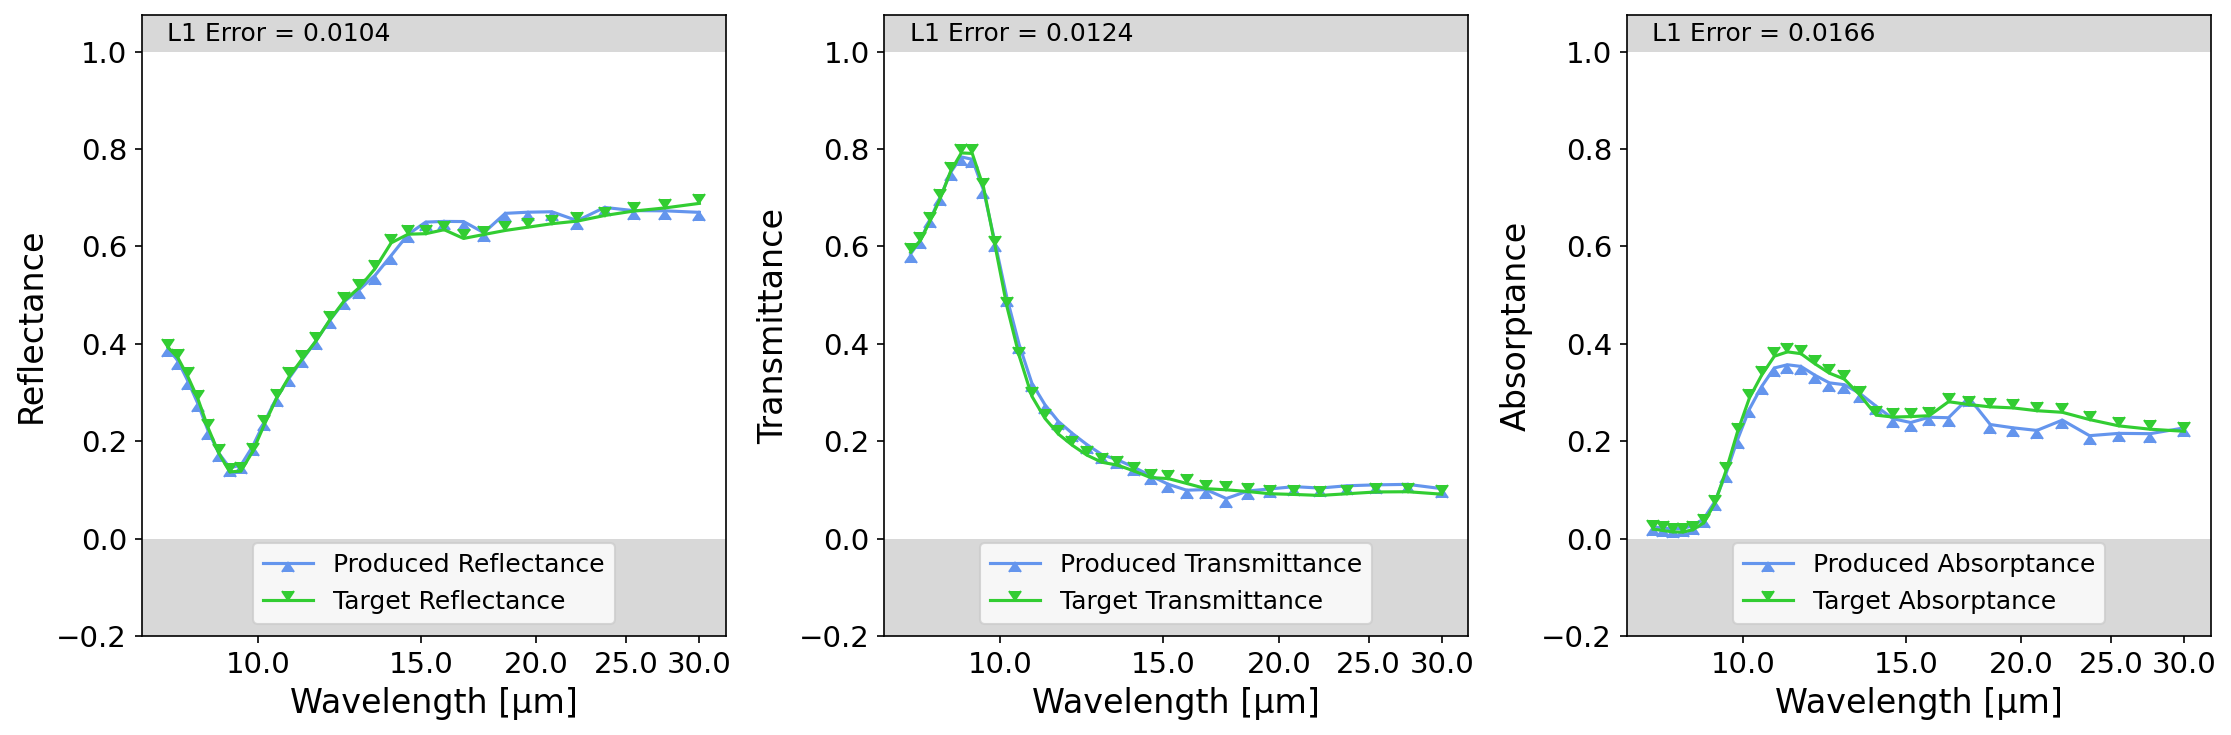

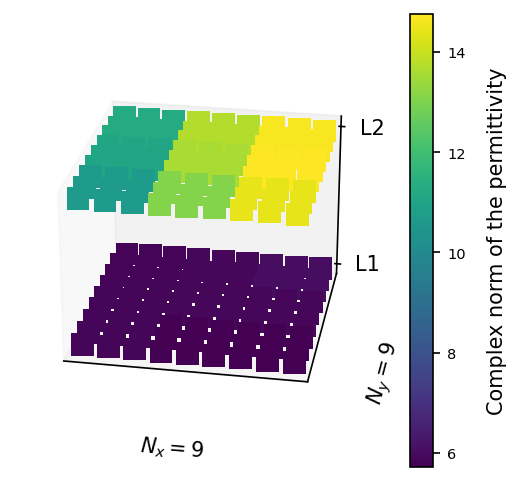

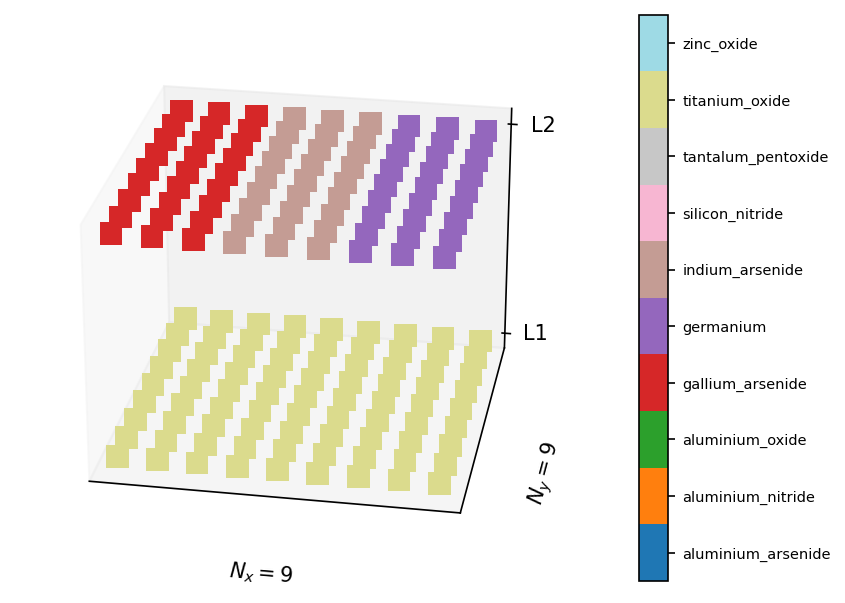

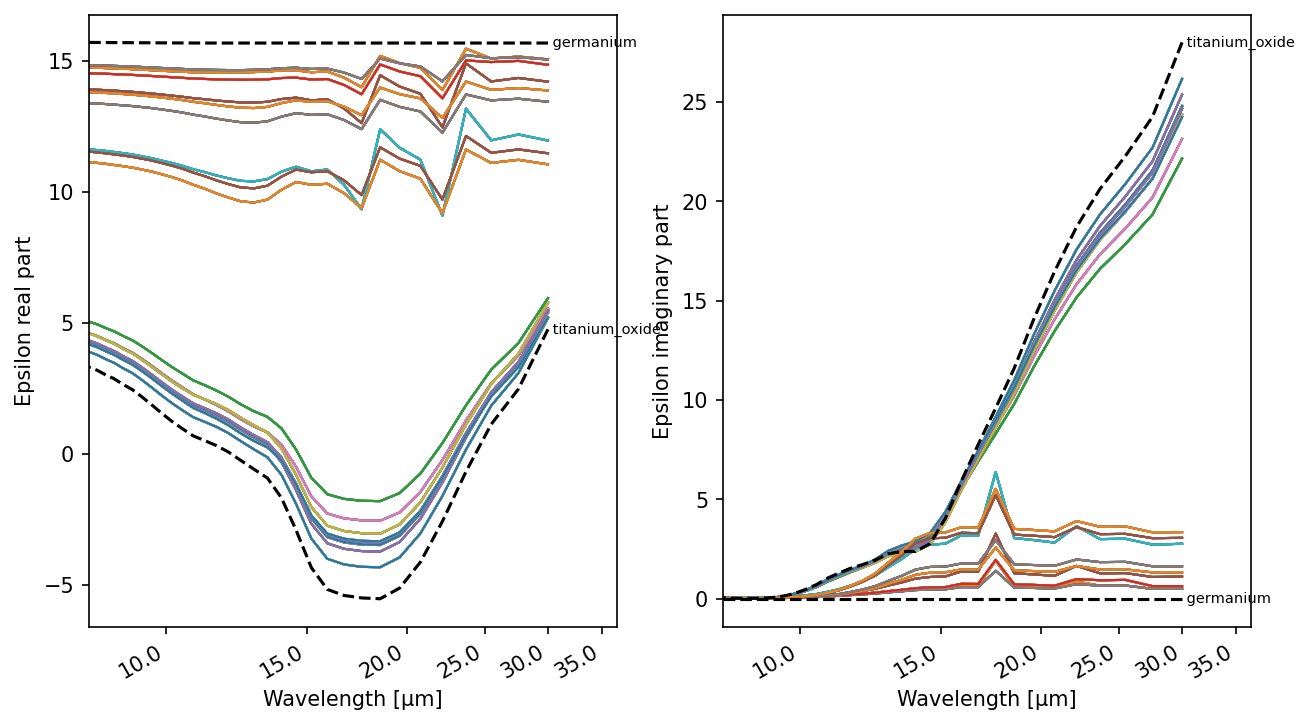

In [30]:
# The other plots
nidn.plot_spectra(cfg)
nidn.plot_model_grid(cfg)
nidn.plot_material_grid(cfg)
nidn.plot_eps_per_point(cfg,compare_to_material=["titanium_oxide","germanium"],legend=False)

In [31]:
cfg.name = "2pattern_rcwa_class"
nidn.save_run(cfg)

10:43:53|NIDN-INFO| Saving run to file: ../results//2pattern_rcwa_class_20-05-2022 10-43-53_run.pk
